So far, only the use of first-order derivatives has been discussed in this chapter. However, the process with first-order derivatives can be slow with some error surfaces. The problem is caused by the nature of <font color='red'>curvature</font> (i.e., <font color='blue'>second-order derivatives</font>, <font color='orange'>changing gradient</font>), where the first-order gradient does not contain the information needed to control the size of the update.

<font color='red'>In general, second-order methods approximate the local loss surface with a quadratic bowl, which is more accurate than the linear approximation.</font> Some second-order methods like the *Newton-methods* require exactly one iteration in order to find the local optimal solution for a quadratic surface. Of course, the loss surface of neural method is typically not quadratic. Nevertheless, the approximation is often good enough that gradient-descent methods are **greatly accelerated** at least in cases where the change in the gradient is not too sudden or drastic.


# Second-Order derivatives

Consider a parameter vector $W = (w_1 \cdots w_d)^T$, which is expressed as a column vector. Its gradient (i.e. first-order derivatives vector) of the loss function $L(W)$ is denoted by

$$G =\nabla L(W)= \left(\frac{\partial L(W)}{\partial w_1} \cdots \frac{\partial L(W)}{\partial w_d}\right)^T$$

And the second-order derivatives of the loss function are of the following form

$$H =\nabla \nabla L(W)= \begin{bmatrix}
\frac{\partial^2 L(W)}{\partial w_1\partial w_1} &\frac{\partial^2 L(W)}{\partial w_1\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_1\partial w_d}\\
\frac{\partial^2 L(W)}{\partial w_2\partial w_1} &\frac{\partial^2 L(W)}{\partial w_2\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_2\partial w_d}\\
\vdots &\vdots &\ddots &\vdots\\
\frac{\partial^2 L(W)}{\partial w_d\partial w_1} &\frac{\partial^2 L(W)}{\partial w_d\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_d\partial w_d}\\
\end{bmatrix}$$

which is called *Hessian matrix*.

## Quadratic approximation and Newton update
One can write a quadratic approximation of the loss function in the vicinity of parameter vector $W_0$ by using the following Taylor expansion

$$L(W) \approx L(W_0) + (W-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W-W_0)^T H (W- W_0)$$

Where

- $W_0$ is the current parameter vector.
- $W$ is the vincinity of $W_0$.
- $\nabla L(W_0)$ is the gradient computed at $W_0$.
- $H$ is the Hessian computed at $W_0$.

For a quadratic loss function, the loss surface is a bowl, and we can use the Newton update to reach the bottom of the bowl in a single step.
$$\begin{align*}
\nabla L(W^*) &= \nabla \Big\{ L(W_0) + (W^*-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W^*-W_0)^T H (W^*- W_0) \Big\}\\
0 &= \nabla L(W_0) + H(W^*-W_0)\\
\Rightarrow W^* &= W_0 - H^{-1}[\nabla L(W_0)]
\end{align*}$$

However, in most cases, the loss function is more complicated, so that Newton method without learning rate can easily lead to gradient explosion, which does not meet our needs.

## Improvement from first-order to second-order

Comparing to the steepest-gradient descent, the second-order method (Newton update) premultiplies the gradient with the inverse of the Hessian. This premultiplication plays a key role in changing the direction of the steepest-graident towards low-curvature directions, because the Hessain matrix comprises the changing rate of every directions for each element in the gradient. This property can greatly accelerate the learning procedure and keep it from suffering oscillation in valley.

Also, the learning rate is already incorporated into the Hessian matrix implicitly, so that we don't need to determine the learning rate during the learning process.




## Limitation

In most large-scale neural network settings, the Hessian is too large to store or compute explicitly. It is not uncommon to have neural networks with millions of parameters. Trying to compute the inverse of a $10^6\times 10^6$ Hessian matrix is impractical with the computational power today. In fact, it is difficult to even compute the Hessian, let alone invert it!

Therefore, many approximations and variations of the Newton method have been developed.

-------------

# Line search along eigenvectors

An intuitive perspective for finding the optimum vector of the bowl given by a Hessian is to make the best (projected) gradient-descent step along each eigenvector so as to minimize the loss function. The best movement along a particular diretion is done using line search to select the step size.

------------------

# Conjugate Gradients
Traditional <a href='https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf'>conjugate gradients</a> algorithm is for solving the linear algebra problem, which is equivalent to minimizing quadratic functions. It has the procedure as follows.

|Step|Pseudocode|Description|
|----|----------|-----------|
|<img width=30/>|<img width=200/>|<img width=200/>|
|1| $\alpha_k = r_{k-1}^T r_{k-1}/d_{k}^T A d_{k}$ | Step length to next $x_k$ |
|2| $x_k = x_{k-1} + \alpha_k d_{k}$ | Approximate solution |
|3| $r_k = r_{k-1} - \alpha_k A d_k$ | New residual |
|4| $\beta_{k+1} = r_k^T r_k/ r_{k-1}^T r_{k-1}$ | Weight of $d_k$ for next direction |
|5| $d_{k+1} = r_k + \beta_{k+1}d_k$ | Next search direction |




However, for the non-linear problem like deep leaning, we need to reformulate the algorithm. There are two difference from the linear case.
1. Because $Ae_i$ is no longer equal to the residual $r_i$, or say negative gradient, we therefore need to compute the step size denoted by $\alpha$ using another method called line search.
2. For the reason that $\alpha$ has changed, $\beta$ can only be computed using its original form
$$\beta = \frac{r_i^T A d_i}{d_i^T A d_i}$$


## Determine the best step size (line search)

The main idea of *line search* is to find the point which has the gradient orthogonal to the current search direction.

$$g(W_{k+1}) = (W_{k+1}-W_{k})^T \nabla L(W_{k+1}) = cd_{k+1}^T r_{k+1} = 0$$

where we have defined the multiplication of the direction and the new gradient as a function $g(\cdot)$. Then our goal turns out to be finding the point that makes this function zero. We will introduce 3 methods here.

### Bisection method
1. Choose two points $a$ and $b$ on the search line that make $g(a) > 0$ and $g(b) < 0$.
2. Compute $g(c)$, where $c=\frac{a+b}{2}$ is the middle point of $a$ and $b$.
3. If the sign of $g(c) > 0$, which indicates that the zero point is in $(b, c)$, thus set $a = c$.
4. If the sign of $g(c) < 0$, which indicates that the zero point is in $(a, c)$, thus set $b = c$.
5. Run the steps $2$ to $4$ iteratively until convergence.


### Secant method
1. Choose two points $a$ and $b$ on the search line that make $g(a) > 0$ and $g(b) < 0$.
2. Compute $g(x)$, where $x$ is the intersection point of the line $g=0$ and the line that go through $g(a)$ and $g(b)$. $x$ therefore has the following expression.
$$\frac{g(b)-g(a)}{b-a}(x-a)+g(a)=0\Rightarrow x = a-\frac{b-a}{g(b)-g(a)}g(a)$$
3. If the sign of $g(x) > 0$, which indicates that the zero point is in $(b, x)$, thus set $a = x$.
4. If the sign of $g(x) < 0$, which indicates that the zero point is in $(a, x)$, thus set $b = x$.
5. Run the steps $2$ to $4$ iteratively until convergence.



### Dekker's method
Unlike the previous two methods, Dekker's method keeps track of three points:
- $a_k$: the current "contrapoint"
- $b_k$: the current guess for the root
- $b_{k-1}$: the previous guess for the root



1. Choose two points $a_0$ and $b_0$ on the search line that make $g(a_0) > 0$ and $g(b_0) < 0$, and define $g(b_{-1}) = g(a)$
2. Compute $c$ using Biection method with $a_k$ and $b_k$.
3. Compute $x$ using Secant method with $b_{k-1}$ and $b_k$.
4. If $c$ is between $x$ and $b_k$ then let $b_{k+1} = c$, otherwise let $b_{k+1} = x$.
5. Check convergence of $g(b_{k+1})$. Stop if convergent.
6. Choose $a_{k+1}$ from $a_k$ and $b_{k}$ such that it has the different sign with $b_{k+1}$.
7. If $g(b_{k+1}) > g(a_{k+1})$ then swap.
8. Run the steps $2$ to $7$ repeatively.



## <font color='#cccccc'>Determine the best direction (first-order)</font>
<font color='#cccccc'>
If we want to compute $\beta$ with only the first-order calculation, we can assume that we are solving the linear problem. Thus 

$$r_k-r_{k-1} = (b-Ax_k)-(b-Ax_{k-1}) = -A(x_k-x_{k-1}) = -cAd_k$$

Substitude into the euqation of $\beta$, we obtain

$$\beta = \frac{r_k^T A d_k}{d_k^T A d_k} = \frac{r_k^T(r_k - r_{k-1})}{d_k^T (r_k - r_{k-1})}$$

</font>


--------------

# Hessian-Free Optimization







----------------------

# Quasi-Newton Methods and BFGS







-----------------------

# Problems with Second-Order Methods:Saddle Points







<IPython.core.display.Javascript object>


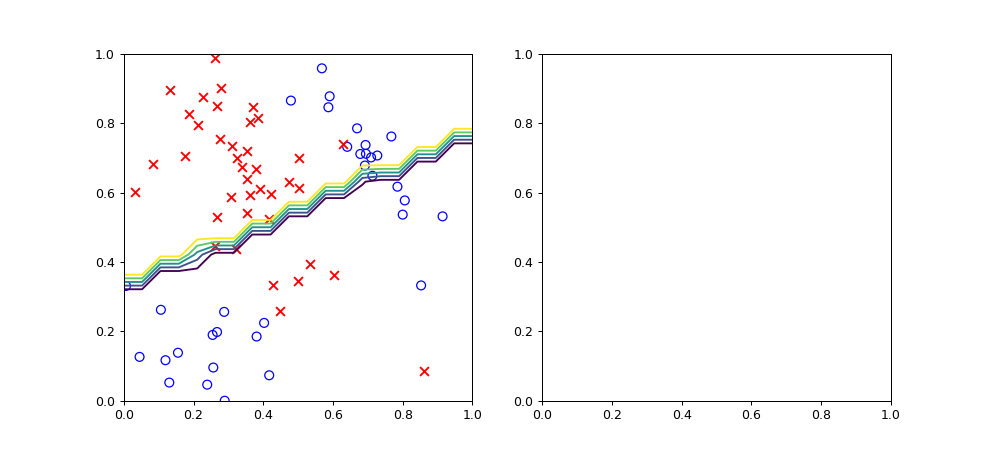

weight is 
 [ 0.50559373  0.27075718  0.023369   -0.50602523 -0.24940212  0.16087654
 -0.09043584 -0.01006336  0.07920559 -0.56118914 -0.18673203  0.45352508
  0.17335233]
weight is 
 [ 1.85671696 -6.34229072  0.82614094 -1.87681429 -2.30110702  4.77590556
  0.94056265  1.13485737 -1.45488255  1.34071215 -5.21602781  2.46442282
 -2.92421694]
weight is 
 [  2.6793926  -10.35336411   1.27747334  -2.77675917  -3.53487514
   7.59321545   1.57200722   1.72332597  -2.35657171   2.474997
  -8.26195395   3.69403217  -4.77943092]
weight is 
 [ 15.7372448  -73.87964839   8.03374023 -17.84708068 -22.99285663
  52.3493483   11.62623731   9.83217476 -16.41619395  20.26729748
 -56.44279125  23.27030872 -33.96565213]
weight is 
 [ 18.98144096 -89.60717248   9.60850145 -21.78140602 -27.80074416
  63.45030106  14.13911978  11.53151102 -19.86273144  24.64840083
 -68.34084272  28.12750239 -41.16501638]
weight is 
 [  22.67560491 -107.45541479   11.27784982  -26.46358866  -33.24963139
   76.06618599   17.

weight is 
 [  21.95781927 -103.90423187   10.82440574  -25.7810235   -32.15603818
   73.58011012   16.4801299    12.44456059  -22.93582224   28.58259253
  -79.08548886   32.56196916  -47.65581928]
weight is 
 [  21.96770827 -103.94918002   10.82013153  -25.80628446  -32.1695194
   73.6125759    16.48859552   12.42741319  -22.94459638   28.59437704
  -79.11830542   32.576006    -47.67555436]
weight is 
 [  21.97142963 -103.966075     10.81844815  -25.81589578  -32.17458501
   73.62478402   16.49178652   12.42078874  -22.94788729   28.59880157
  -79.1306328    32.58128319  -47.68296662]
weight is 
 [  21.97431441 -103.97915602   10.81708457  -25.82342941  -32.17850571
   73.63424025   16.49426445   12.41551707  -22.95042953   28.60222329
  -79.14017114   32.58536987  -47.68870104]
weight is 
 [  21.977465   -103.99342429   10.81553091  -25.83174902  -32.18278071
   73.64455932   16.49697558   12.40960764  -22.95319596   28.60595111
  -79.15056813   32.58982829  -47.69495081]
weight is 


weight is 
 [  22.3413123  -105.60314631   10.50817428  -26.96864046  -32.66190166
   74.81826981   16.82031716   11.42420544  -23.25181411   29.01907061
  -80.30975157   33.09282164  -48.39126226]
weight is 
 [  22.34174868 -105.60491352   10.50760636  -26.97031332  -32.66241473
   74.81959859   16.82074896   11.42231071  -23.25208618   29.01952506
  -80.31097013   33.09334313  -48.39202221]
weight is 
 [  22.34221724 -105.60680151   10.50698763  -26.97212431  -32.66296204
   74.82102074   16.82121518   11.42023894  -23.25237331   29.02001085
  -80.31226856   33.09389808  -48.39283404]
weight is 
 [  22.34273635 -105.6088823    10.5062925   -26.97414688  -32.6635643
   74.82259104   16.82173461   11.41790205  -23.25268572   29.02054661
  -80.31369567   33.09450721  -48.39372873]
weight is 
 [  22.34333745 -105.61127883   10.50547665  -26.97650753  -32.66425683
   74.82440312   16.82233958   11.4151476   -23.25304069   29.0211641
  -80.31533466   33.09520575  -48.39475916]
weight is 
 

weight is 
 [  22.34056051 -105.60071416   10.50930439  -26.96530454  -32.66124785
   74.81627741   16.81940838   11.42912927  -23.25166572   29.01840961
  -80.30829909   33.09225953  -48.39020261]
weight is 
 [  22.34070062 -105.60119024   10.50902329  -26.96599829  -32.66137823
   74.81665983   16.8195716    11.42814111  -23.25170518   29.01853434
  -80.30859498   33.09237968  -48.39040637]
weight is 
 [  22.34084196 -105.60166858   10.50873767  -26.9667014   -32.66150904
   74.81704469   16.81973677   11.42713634  -23.25174399   29.01865972
  -80.30889147   33.0924999   -48.39061107]
weight is 
 [  22.34098528 -105.6021517    10.50844598  -26.96741771  -32.66164095
   74.81743403   16.8199048    11.42610937  -23.25178231   29.01878641
  -80.3091901    33.09262079  -48.3908178 ]
weight is 
 [  22.34113145 -105.60264238   10.50814644  -26.96815154  -32.66177472
   74.8178301    16.82007671   11.42505384  -23.25182033   29.01891515
  -80.30949252   33.09274304  -48.39102773]
weight is 

weight is 
 [  22.33917224 -105.59778829   10.51336738  -26.95612997  -32.66062928
   74.81335582   16.81730867   11.44522129  -23.25221271   29.01756059
  -80.30724678   33.09202335  -48.38894409]
weight is 
 [  22.33926518 -105.59805418   10.51313491  -26.95666647  -32.66069699
   74.81358534   16.81743039   11.44437205  -23.25221272   29.01763209
  -80.30739082   33.09207688  -48.38905761]
weight is 
 [  22.33935379 -105.598307     10.51291215  -26.95717957  -32.6607613
   74.81380383   16.81754661   11.44355894  -23.25221238   29.0177001
  -80.30752746   33.09212759  -48.38916552]
weight is 
 [  22.33943864 -105.59854848   10.51269778  -26.95767245  -32.66082265
   74.81401276   16.81765808   11.44277699  -23.25221172   29.01776506
  -80.30765765   33.09217583  -48.38926857]
weight is 
 [  22.33952022 -105.59878001   10.51249066  -26.95814778  -32.66088139
   74.81421332   16.81776542   11.44202204  -23.25221076   29.01782735
  -80.30778216   33.0922219   -48.38936736]
weight is 
 

weight is 
 [  22.34215513 -105.60580871   10.50522897  -26.97437214  -32.6626096
   74.82047383   16.82135331   11.41561786  -23.25194371   29.01973166
  -80.31133577   33.0934804   -48.39235634]
weight is 
 [  22.34226321 -105.60607824   10.5049128   -26.97506755  -32.66267342
   74.82072154   16.82150554   11.41446009  -23.2519229    29.01980547
  -80.3114619    33.09352224  -48.39247072]
weight is 
 [  22.34238145 -105.60637193   10.5045661   -26.97582982  -32.6627428
   74.82099197   16.8216724    11.41318937  -23.25189952   29.01988597
  -80.31159863   33.09356738  -48.39259536]
weight is 
 [  22.34251305 -105.60669747   10.50417935  -26.97667982  -32.66281952
   74.82129231   16.82185847   11.41177056  -23.2518728    29.01997528
  -80.31174943   33.09361692  -48.39273352]
weight is 
 [  22.34266303 -105.60706694   10.50373766  -26.97765029  -32.66290638
   74.82163384   16.82207092   11.41014858  -23.25184156   29.02007673
  -80.31191969   33.09367256  -48.39289032]
weight is 
 

weight is 
 [  22.34111715 -105.60322224   10.50814507  -26.9678335   -32.66199733
   74.81809597   16.81989081   11.42653164  -23.25214434   29.01901833
  -80.31012839   33.09308427  -48.39125374]
weight is 
 [  22.34115877 -105.60331362   10.50800921  -26.96812339  -32.66201724
   74.81818536   16.81995278   11.42603296  -23.25212982   29.01904385
  -80.310164     33.09309398  -48.3912923 ]
weight is 
 [  22.34120089 -105.6034058    10.50787144  -26.96841722  -32.66203727
   74.81827567   16.82001556   11.42552715  -23.25211496   29.01906961
  -80.31019974   33.09310366  -48.39133118]
weight is 
 [  22.34124357 -105.60349891   10.50773154  -26.96871544  -32.66205747
   74.81836704   16.82007927   11.42501342  -23.25209976   29.01909564
  -80.31023564   33.0931133   -48.39137045]
weight is 
 [  22.34128688 -105.6035931    10.50758929  -26.96901853  -32.66207784
   74.81845962   16.82014399   11.42449092  -23.25208417   29.01912199
  -80.31027176   33.09312294  -48.39141018]
weight is 

weight is 
 [  22.34949843 -105.62000817   10.47967703  -27.028245    -32.66539911
   74.83531306   16.83280365   11.32048282  -23.24837326   29.0238068
  -80.31560538   33.09418005  -48.39832984]
weight is 
 [  22.34964358 -105.62027882   10.47918464  -27.02930151  -32.66545051
   74.83560148   16.83303268   11.31859752  -23.24829752   29.02388614
  -80.3156791    33.09418769  -48.39844462]
weight is 
 [  22.34982426 -105.62061404   10.47857222  -27.03061699  -32.66551386
   74.83595968   16.83331822   11.31624738  -23.24820239   29.02398461
  -80.31576909   33.09419624  -48.39858687]
weight is 
 [  22.35007901 -105.62108435   10.47770949  -27.03247231  -32.6656023
   74.83646359   16.83372145   11.312929    -23.24806703   29.02412307
  -80.31589351   33.09420694  -48.39878657]
weight is 
 [  22.35061257 -105.62206446   10.47590419  -27.03635917  -32.66578571
   74.83751661   16.83456733   11.30596901  -23.247781     29.02441225
  -80.31614891   33.09422651  -48.39920299]
weight is 
 

weight is 
 [  22.34829097 -105.61828298   10.48359527  -27.01934882  -32.66516847
   74.83317015   16.83075672   11.33721817  -23.24927574   29.02323257
  -80.31554762   33.09442126  -48.39756996]
weight is 
 [  22.3483406  -105.61835932   10.48343072  -27.01971501  -32.66517998
   74.83326087   16.83083939   11.3365389   -23.24924146   29.02325697
  -80.31555574   33.09441456  -48.39760313]
weight is 
 [  22.34839026 -105.61843542   10.48326602  -27.02008167  -32.66519139
   74.83335152   16.83092219   11.33585834  -23.24920699   29.02328135
  -80.31556356   33.09440769  -48.3976362 ]
weight is 
 [  22.34844008 -105.61851146   10.48310076  -27.02044969  -32.66520272
   74.83344231   16.83100534   11.33517484  -23.24917226   29.02330574
  -80.31557108   33.09440063  -48.39766926]
weight is 
 [  22.34849019 -105.61858764   10.48293455  -27.02081998  -32.665214
   74.83353347   16.83108905   11.33448667  -23.24913717   29.02333022
  -80.31557834   33.09439336  -48.39770239]
weight is 
 

weight is 
 [  22.35253353 -105.62422682   10.46962475  -27.05087286  -32.66593432
   74.84064284   16.83798058   11.27784475  -23.24604224   29.02521854
  -80.31562774   33.09351623  -48.40018349]
weight is 
 [  22.3524063  -105.62406222   10.47004122  -27.04992252  -32.66591646
   74.84042541   16.83776028   11.2796556   -23.24614625   29.02516118
  -80.31563967   33.09355127  -48.40011014]
weight is 
 [  22.35227838 -105.62389738   10.47045985  -27.04896675  -32.66589874
   74.84020711   16.8375386    11.2814778   -23.24625116   29.02510362
  -80.31565236   33.09358688  -48.40003663]
weight is 
 [  22.3521494  -105.62373183   10.47088182  -27.04800281  -32.66588112
   74.83998732   16.8373149    11.28331662  -23.24635729   29.02504567
  -80.31566585   33.09362318  -48.39996275]
weight is 
 [  22.35201889 -105.623565     10.47130863  -27.04702726  -32.66586354
   74.83976526   16.83708837   11.28517862  -23.24646502   29.02498715
  -80.3156802    33.09366029  -48.39988825]
weight is 

weight is 
 [  22.3577198  -105.62979439   10.45303605  -27.08984441  -32.66623522
   74.84895003   16.84726868   11.20174375  -23.24121081   29.02737032
  -80.31393528   33.09142639  -48.40274997]
weight is 
 [  22.35757726 -105.62963735   10.45349834  -27.0887691   -32.66622544
   74.84871977   16.84701447   11.20383419  -23.24134148   29.02731048
  -80.31397739   33.09148149  -48.4026779 ]
weight is 
 [  22.3574377  -105.62948407   10.45395122  -27.08771584  -32.66621603
   74.84849458   16.84676547   11.20588227  -23.24146964   29.02725197
  -80.31401909   33.0915357   -48.40260749]
weight is 
 [  22.35730083 -105.62933418   10.45439567  -27.08668231  -32.66620696
   74.84827393   16.84652115   11.20789244  -23.24159555   29.02719465
  -80.31406045   33.09158911  -48.40253861]
weight is 
 [  22.35716639 -105.6291874    10.45483247  -27.08566666  -32.66619823
   74.84805743   16.84628105   11.20986829  -23.24171946   29.02713842
  -80.31410152   33.09164184  -48.40247111]
weight is 

weight is 
 [  22.35303559 -105.62493019   10.46834224  -27.05423104  -32.66602385
   74.84152895   16.83883547   11.27132969  -23.24565576   29.0254504
  -80.31562485   33.09340775  -48.40048897]
weight is 
 [  22.35294119 -105.62483944   10.46865164  -27.05350835  -32.6660223
   74.84138296   16.83866355   11.27275147  -23.24574907   29.02541285
  -80.31566647   33.09345189  -48.40044605]
weight is 
 [  22.3528469  -105.62474911   10.46896065  -27.05278635  -32.66602088
   74.84123728   16.83849175   11.27417236  -23.24584244   29.02537539
  -80.31570838   33.09349618  -48.40040329]
weight is 
 [  22.35275263 -105.62465913   10.46926952  -27.05206439  -32.66601957
   74.8410918    16.83831989   11.27559364  -23.24593596   29.02533799
  -80.31575062   33.09354064  -48.40036066]
weight is 
 [  22.35265828 -105.62456939   10.46957858  -27.05134176  -32.66601839
   74.84094637   16.83814782   11.27701674  -23.24602971   29.02530062
  -80.31579322   33.09358532  -48.40031812]
weight is 
 

weight is 
 [  22.3570737  -105.62839266   10.4553058   -27.08517621  -32.66593303
   74.84756972   16.84630225   11.20974611  -23.24144699   29.02698988
  -80.31340025   33.09127472  -48.40217103]
weight is 
 [  22.3569693  -105.62830535   10.45564828  -27.08436957  -32.66593619
   74.84741465   16.84610861   11.21135107  -23.24155689   29.02695041
  -80.31345989   33.0913311   -48.40212833]
weight is 
 [  22.35686623 -105.62821941   10.45598655  -27.08357295  -32.6659394
   74.84726168   16.84591737   11.21293635  -23.24166551   29.02691149
  -80.31351903   33.09138691  -48.40208626]
weight is 
 [  22.35676443 -105.62813476   10.45632083  -27.08278577  -32.66594266
   74.8471107    16.84572841   11.21450306  -23.24177293   29.02687308
  -80.31357769   33.09144217  -48.4020448 ]
weight is 
 [  22.35666381 -105.62805134   10.45665133  -27.08200755  -32.66594597
   74.8469616    16.8455416    11.2160522   -23.24187921   29.02683516
  -80.31363591   33.09149692  -48.40200391]
weight is 


weight is 
 [  22.35341798 -105.62550496   10.46736555  -27.05676961  -32.66610668
   74.84222282   16.83947605   11.26645938  -23.24538174   29.02563452
  -80.3156636    33.0933467   -48.40073728]
weight is 
 [  22.3533424  -105.62544939   10.46761549  -27.05617941  -32.66611181
   74.84211429   16.8393338    11.26764304  -23.24546521   29.02560715
  -80.31571469   33.09339193  -48.40070914]
weight is 
 [  22.35326703 -105.62539416   10.46786468  -27.05559085  -32.666117
   74.84200617   16.83919193   11.26882368  -23.24554853   29.02557988
  -80.31576582   33.09343713  -48.40068114]
weight is 
 [  22.35319186 -105.62533925   10.46811321  -27.05500369  -32.66612223
   74.84189842   16.83905036   11.27000177  -23.24563173   29.02555271
  -80.31581702   33.09348233  -48.40065329]
weight is 
 [  22.35311685 -105.62528464   10.46836121  -27.05441766  -32.66612753
   74.84179097   16.83890903   11.27117785  -23.24571485   29.02552562
  -80.3158683    33.09352754  -48.40062555]
weight is 
 

weight is 
 [  22.35029633 -105.62334525   10.47764643  -27.03236041  -32.66636919
   74.83780671   16.83356467   11.31562553  -23.24889904   29.02452516
  -80.31791647   33.09529383  -48.39962433]
weight is 
 [  22.35042833 -105.62342895   10.47721538  -27.03339305  -32.66635523
   74.83798974   16.8338167    11.31353271  -23.24874634   29.02457082
  -80.31781311   33.09520707  -48.39966856]
weight is 
 [  22.35065208 -105.6235703    10.47648505  -27.03514331  -32.66633137
   74.83829972   16.83424402   11.30998458  -23.24848725   29.02464813
  -80.31763736   33.0950597   -48.39974333]
weight is 
 [  22.34159154 -105.61786746   10.50604696  -26.9642676   -32.66730525
   74.82575715   16.81693403   11.45370039  -23.25899003   29.02152095
  -80.32477643   33.10103944  -48.39672334]
weight is 
 [  22.34160395 -105.61787526   10.50600641  -26.96436476  -32.66730391
   74.82577433   16.81695775   11.45350338  -23.25897564   29.02152523
  -80.32476664   33.10103124  -48.39672747]
weight is 

weight is 
 [  22.34201271 -105.61812499   10.50464264  -26.96760005  -32.6672571
   74.82633658   16.81774071   11.44695177  -23.25849773   29.02166354
  -80.32443683   33.10075844  -48.39685935]
weight is 
 [  22.34202233 -105.61813068   10.50460986  -26.96767704  -32.66725593
   74.82634972   16.81775918   11.44679606  -23.25848639   29.02166673
  -80.32442888   33.10075195  -48.39686235]
weight is 
 [  22.34203191 -105.61813634   10.50457718  -26.96775375  -32.66725476
   74.8263628    16.81777758   11.4466409   -23.25847508   29.0216699
  -80.32442095   33.10074548  -48.39686533]
weight is 
 [  22.34204144 -105.61814196   10.5045446   -26.9678302   -32.66725359
   74.82637583   16.8177959    11.44648628  -23.25846382   29.02167305
  -80.32441305   33.10073903  -48.39686829]
weight is 
 [  22.34205095 -105.61814756   10.50451211  -26.9679064   -32.66725242
   74.82638879   16.81781416   11.44633219  -23.2584526    29.02167619
  -80.32440517   33.1007326   -48.39687124]
weight is 
 

weight is 
 [  22.34239399 -105.61834303   10.50331778  -26.97068462  -32.66720777
   74.82685393   16.81847505   11.44071806  -23.2580439    29.02178732
  -80.32411383   33.10049778  -48.39697399]
weight is 
 [  22.34240276 -105.61834785   10.50328672  -26.9707563   -32.66720656
   74.82686574   16.81849199   11.44057329  -23.25803337   29.0217901
  -80.32410621   33.1004917   -48.39697652]
weight is 
 [  22.34241152 -105.61835267   10.50325565  -26.970828    -32.66720535
   74.82687753   16.81850892   11.44042851  -23.25802283   29.02179288
  -80.32409858   33.10048562  -48.39697904]
weight is 
 [  22.34242029 -105.61835747   10.50322456  -26.97089971  -32.66720414
   74.82688932   16.81852585   11.44028371  -23.25801228   29.02179566
  -80.32409094   33.10047954  -48.39698157]
weight is 
 [  22.34242905 -105.61836226   10.50319346  -26.97097143  -32.66720292
   74.82690111   16.81854278   11.44013888  -23.25800174   29.02179843
  -80.32408329   33.10047346  -48.39698408]
weight is 


weight is 
 [  22.3427682  -105.61854097   10.50197116  -26.97377169  -32.66715324
   74.82735402   16.8192001    11.4344861   -23.25758984   29.02190355
  -80.32378014   33.10023491  -48.39707784]
weight is 
 [  22.34277751 -105.61854569   10.50193715  -26.97384916  -32.6671518
   74.82736637   16.81921819   11.43432974  -23.25757843   29.02190637
  -80.32377162   33.10022827  -48.39708032]
weight is 
 [  22.34278686 -105.61855041   10.501903    -26.97392693  -32.66715036
   74.82737875   16.81923635   11.43417277  -23.25756698   29.02190921
  -80.32376306   33.10022161  -48.3970828 ]
weight is 
 [  22.34279624 -105.61855515   10.5018687   -26.97400501  -32.66714891
   74.82739118   16.81925458   11.43401517  -23.25755548   29.02191205
  -80.32375447   33.10021492  -48.39708529]
weight is 
 [  22.34280565 -105.61855989   10.50183426  -26.97408342  -32.66714745
   74.82740364   16.81927289   11.43385692  -23.25754393   29.0219149
  -80.32374582   33.1002082   -48.39708778]
weight is 
 

weight is 
 [  22.34320588 -105.61875287   10.50035255  -26.97744008  -32.66708202
   74.82792957   16.82005339   11.42708076  -23.25704822   29.02203354
  -80.32336929   33.0999184   -48.39718924]
weight is 
 [  22.34321815 -105.61875854   10.5003067   -26.97754357  -32.66707992
   74.82794558   16.82007738   11.42687178  -23.2570329    29.0220371
  -80.32335749   33.0999094   -48.39719223]
weight is 
 [  22.34323056 -105.61876426   10.50026031  -26.97764823  -32.66707779
   74.82796175   16.82010165   11.42666042  -23.25701739   29.0220407
  -80.32334555   33.09990029  -48.39719524]
weight is 
 [  22.3432431  -105.61877004   10.50021338  -26.97775411  -32.66707563
   74.82797811   16.82012619   11.42644659  -23.2570017    29.02204434
  -80.32333345   33.09989108  -48.39719828]
weight is 
 [  22.34325579 -105.61877586   10.50016587  -26.97786127  -32.66707345
   74.82799464   16.82015102   11.42623019  -23.25698583   29.02204802
  -80.3233212    33.09988174  -48.39720135]
weight is 
 

weight is 
 [  22.34399191 -105.61909546   10.49738641  -26.98411043  -32.66693969
   74.82894504   16.82159605   11.41360009  -23.25605516   29.02225645
  -80.32259126   33.09933152  -48.39737076]
weight is 
 [  22.34403009 -105.61911135   10.49724149  -26.98443566  -32.66693249
   74.828994     16.82167118   11.41294231  -23.25600652   29.02226709
  -80.32255267   33.09930264  -48.39737922]
weight is 
 [  22.34407168 -105.61912862   10.49708355  -26.98479007  -32.66692463
   74.82904732   16.82175304   11.41222551  -23.25595351   29.02227866
  -80.32251059   33.09927115  -48.39738842]
weight is 
 [  22.34411759 -105.61914762   10.49690915  -26.98518135  -32.66691594
   74.82910615   16.82184342   11.41143406  -23.25589497   29.02229142
  -80.32246408   33.09923637  -48.39739855]
weight is 
 [  22.34416918 -105.61916893   10.49671314  -26.98562112  -32.66690615
   74.82917223   16.82194499   11.41054452  -23.25582916   29.02230575
  -80.32241175   33.09919725  -48.39740991]
weight is 

weight is 
 [  22.34437913 -105.61927275   10.49593093  -26.98738726  -32.66687279
   74.8294494    16.82235372   11.40698574  -23.25557043   29.02236805
  -80.32221703   33.09904705  -48.39746374]
weight is 
 [  22.34449996 -105.61931761   10.49546737  -26.98842406  -32.66684795
   74.82960175   16.82259296   11.40488444  -23.25541361   29.02240041
  -80.32208912   33.09895281  -48.39748809]
weight is 
 [  22.34477072 -105.61941784   10.4944284   -26.99074769  -32.6667922
   74.82994301   16.82312914   11.40017486  -23.25506206   29.02247285
  -80.32180219   33.09874149  -48.39754254]
weight is 
 [  22.34453021 -105.61932906   10.49535149  -26.98868337  -32.66684182
   74.82964      16.82265281   11.40435907  -23.25537446   29.02240856
  -80.32205732   33.09892932  -48.39749429]
weight is 
 [  22.3449056  -105.61946725   10.49391036  -26.99190596  -32.66676422
   74.83011277   16.82339639   11.39782683  -23.25488665   29.02250882
  -80.32165869   33.09863594  -48.39756944]
weight is 


weight is 
 [  22.39270741 -105.63663067   10.31136786  -27.40087153  -32.65672527
   74.89009525   16.9182008    10.56789726  -23.19255907   29.03531644
  -80.27042167   33.06093464  -48.40709214]
weight is 
 [  22.39273625 -105.63663208   10.31131333  -27.40103687  -32.65671612
   74.89012665   16.9182604    10.5675265   -23.19251773   29.03532882
  -80.27038063   33.0609018   -48.40710084]
weight is 
 [  22.39276509 -105.6366333    10.31125996  -27.4012005   -32.65670691
   74.89015796   16.91832006   10.56715844  -23.1924763    29.03534131
  -80.27033935   33.06086873  -48.40710962]
weight is 
 [  22.39279397 -105.63663433   10.31120772  -27.40136254  -32.65669762
   74.8901892    16.91837984   10.56679285  -23.19243475   29.03535391
  -80.27029783   33.06083541  -48.40711847]
weight is 
 [  22.39282288 -105.63663519   10.31115656  -27.4015231   -32.65668825
   74.89022039   16.91843976   10.56642947  -23.19239306   29.03536663
  -80.27025603   33.06080183  -48.4071274 ]
weight is 

weight is 
 [  22.39412525 -105.63653491   10.30974985  -27.40741002  -32.65621852
   74.89155088   16.92117564   10.55224775  -23.19045768   29.03601599
  -80.26821482   33.05912905  -48.40757991]
weight is 
 [  22.39417139 -105.6365279    10.30972284  -27.40758404  -32.65620069
   74.89159615   16.92127348   10.55180183  -23.19038769   29.03604096
  -80.26813855   33.05906576  -48.40759725]
weight is 
 [  22.39421873 -105.63652054   10.3096962   -27.40776098  -32.65618234
   74.89164252   16.92137393   10.55134696  -23.1903158    29.03606667
  -80.26806009   33.05900061  -48.40761511]
weight is 
 [  22.39426737 -105.63651282   10.30966993  -27.40794109  -32.65616342
   74.89169008   16.92147719   10.55088235  -23.19024187   29.03609318
  -80.26797928   33.05893347  -48.40763352]
weight is 
 [  22.39431742 -105.6365047    10.30964403  -27.40812469  -32.6561439
   74.89173893   16.92158348   10.55040714  -23.19016573   29.03612056
  -80.26789594   33.0588642   -48.40765253]
weight is 


weight is 
 [  22.39531373 -105.63631627   10.30931262  -27.4115037   -32.65574605
   74.89269683   16.9237065    10.5413986   -23.18863883   29.03668089
  -80.26620588   33.05745358  -48.40804122]
weight is 
 [  22.39543854 -105.63628358   10.30933289  -27.4118297   -32.65569311
   74.89281191   16.9239749    10.54043296  -23.18844387   29.03675668
  -80.2659837    33.05726594  -48.40809382]
weight is 
 [  22.39557789 -105.63624681   10.3093574   -27.41219075  -32.6556339
   74.89294026   16.92427465   10.53935969  -23.1882261    29.03684147
  -80.26573532   33.05705612  -48.40815266]
weight is 
 [  22.39573729 -105.63620445   10.30938755  -27.41260042  -32.65556607
   74.8930869    16.92461761   10.53813758  -23.18797686   29.03693864
  -80.26545085   33.05681574  -48.4082201 ]
weight is 
 [  22.39592666 -105.63615375   10.30942587  -27.41308319  -32.65548537
   74.89326091   16.92502513   10.5366923   -23.18768063   29.03705431
  -80.26511248   33.05652973  -48.40830037]
weight is 


weight is 
 [  22.39398928 -105.63665772   10.30911793  -27.40804443  -32.65630576
   74.89147314   16.92085975   10.55161521  -23.19070443   29.03587636
  -80.26855703   33.05944021  -48.4074816 ]
weight is 
 [  22.39405887 -105.63663511   10.30915804  -27.40818243  -32.65627472
   74.89153495   16.92101058   10.55114851  -23.19059391   29.03592113
  -80.2684281    33.05933044  -48.40751261]
weight is 
 [  22.3941301  -105.63661189   10.30919969  -27.40832279  -32.65624293
   74.89159818   16.92116499   10.55067226  -23.19048075   29.035967
  -80.26829601   33.05921797  -48.40754438]
weight is 
 [  22.3942031  -105.63658799   10.30924298  -27.40846572  -32.65621032
   74.89166294   16.92132327   10.55018569  -23.19036473   29.03601407
  -80.26816054   33.0591026   -48.40757698]
weight is 
 [  22.39427802 -105.63656338   10.30928801  -27.40861146  -32.65617681
   74.89172934   16.92148572   10.54968791  -23.19024564   29.03606243
  -80.26802142   33.05898409  -48.40761047]
weight is 
 

weight is 
 [  22.3977242  -105.63537637   10.31174053  -27.41472651  -32.65461694
   74.89475431   16.92897327   10.52777005  -23.18474491   29.03831992
  -80.26155823   33.05346718  -48.40917402]
weight is 
 [  22.39542211 -105.63622568   10.30972074  -27.41126293  -32.65567796
   74.89276456   16.92395632   10.54135516  -23.18844131   29.03677589
  -80.26593909   33.05722006  -48.40810385]
weight is 
 [  22.39557913 -105.63616761   10.30985944  -27.4114977   -32.65560554
   74.8929002    16.92429855   10.54043102  -23.18818914   29.03688129
  -80.26564013   33.05696392  -48.4081769 ]
weight is 
 [  22.39575073 -105.63610401   10.31001206  -27.41175266  -32.65552635
   74.89304837   16.9246726    10.53942375  -23.18791348   29.03699657
  -80.26531323   33.05668381  -48.40825681]
weight is 
 [  22.39594123 -105.63603324   10.31018261  -27.4120339   -32.65543839
   74.89321275   16.92508788   10.53830861  -23.18760741   29.03712464
  -80.26495016   33.05637268  -48.40834557]
weight is 

weight is 
 [  22.37041919 -105.64598334   10.28408946  -27.37952538  -32.6673831
   74.87144414   16.86932376   10.67898865  -23.22880039   29.01966974
  -80.31413014   33.09862343  -48.39624293]
weight is 
 [  22.37027835 -105.64603938   10.28393402  -27.37935649  -32.66744951
   74.87132445   16.86901572   10.67975252  -23.22902853   29.01957295
  -80.3144035    33.09885823  -48.39617595]
weight is 
 [  22.37013742 -105.64609553   10.28377772  -27.37918823  -32.66751598
   74.87120472   16.86870747   10.68051595  -23.22925686   29.01947606
  -80.31467715   33.09909328  -48.39610891]
weight is 
 [  22.36999639 -105.64615179   10.28362056  -27.37902059  -32.66758254
   74.87108494   16.86839899   10.68127899  -23.2294854    29.01937908
  -80.31495111   33.0993286   -48.39604182]
weight is 
 [  22.36985526 -105.64620816   10.28346251  -27.37885355  -32.66764917
   74.87096509   16.86809027   10.68204167  -23.22971416   29.01928199
  -80.31522539   33.09956419  -48.39597466]
weight is 


weight is 
 [  22.3643378  -105.64846371   10.27668405  -27.37289877  -32.67027688
   74.86629935   16.8560068    10.71112912  -23.23869603   29.01546208
  -80.32604159   33.10885369  -48.39333779]
weight is 
 [  22.36418659 -105.64852682   10.27648201  -27.37275121  -32.67034947
   74.86617195   16.85567531   10.71190622  -23.23894319   29.01535676
  -80.32634042   33.10911031  -48.39326523]
weight is 
 [  22.36403498 -105.64859015   10.27627857  -27.37260407  -32.67042228
   74.86604423   16.8553429    10.71268436  -23.23919106   29.01525113
  -80.32664018   33.10936774  -48.39319245]
weight is 
 [  22.36388294 -105.64865372   10.27607371  -27.37245734  -32.67049533
   74.86591618   16.85500956   10.71346359  -23.23943966   29.01514517
  -80.3269409    33.10962598  -48.39311946]
weight is 
 [  22.36373048 -105.64871753   10.27586742  -27.37231103  -32.6705686
   74.86578779   16.85467526   10.71424393  -23.23968902   29.01503889
  -80.32724257   33.10988505  -48.39304624]
weight is 


weight is 
 [  22.35751483 -105.65136547   10.26675994  -27.3670157   -32.67357798
   74.86056858   16.84103394   10.7451826   -23.24989504   29.01068051
  -80.33963689   33.12052779  -48.39004875]
weight is 
 [  22.35733646 -105.65144262   10.26647965  -27.36688193  -32.6736649
   74.86041916   16.84064216   10.74604652  -23.25018898   29.01055477
  -80.33999507   33.12083533  -48.38996239]
weight is 
 [  22.35715707 -105.65152028   10.26619676  -27.36674835  -32.67375236
   74.8602689    16.84024812   10.74691413  -23.25048466   29.01042828
  -80.34035544   33.12114475  -48.38987552]
weight is 
 [  22.35697662 -105.65159844   10.26591121  -27.36661494  -32.67384035
   74.86011777   16.83985175   10.74778555  -23.25078213   29.01030101
  -80.34071805   33.12145608  -48.38978812]
weight is 
 [  22.3567951  -105.65167713   10.26562296  -27.36648169  -32.6739289
   74.85996575   16.839453     10.74866092  -23.25108144   29.01017295
  -80.34108296   33.12176939  -48.38970017]
weight is 
 

weight is 
 [  22.34847193 -105.65533468   10.25146092  -27.3612795   -32.67801476
   74.85300776   16.82115625   10.78759024  -23.26485591   29.00426935
  -80.35793312   33.13623561  -48.38565104]
weight is 
 [  22.34817595 -105.65546614   10.25092876  -27.36112189  -32.67816081
   74.85276063   16.82050522   10.78893804  -23.26534728   29.00405847
  -80.35853586   33.13675304  -48.38550654]
weight is 
 [  22.34787052 -105.65560186   10.25037802  -27.36096079  -32.67831157
   74.85250562   16.81983341   10.79032679  -23.26585442   29.00384081
  -80.35915802   33.13728713  -48.3853574 ]
weight is 
 [  22.34755439 -105.65574242   10.24980632  -27.36079561  -32.67846765
   74.85224168   16.81913801   10.79176212  -23.26637942   29.00361547
  -80.35980221   33.13784013  -48.385203  ]
weight is 
 [  22.34722597 -105.65588852   10.24921069  -27.36062566  -32.67862984
   74.85196749   16.81841558   10.79325102  -23.26692492   29.00338131
  -80.36047164   33.13841479  -48.38504257]
weight is 

weight is 
 [  22.33586934 -105.66100281   10.22719036  -27.35611065  -32.68427525
   74.84249436   16.79341708   10.84291615  -23.28586776   28.99523822
  -80.38379841   33.15843627  -48.37947002]
weight is 
 [  22.33616672 -105.660868     10.22778702  -27.35620981  -32.68412685
   74.84274238   16.79407192   10.84164084  -23.28537044   28.99545211
  -80.3831848    33.1579097   -48.37961627]
weight is 
 [  22.33648442 -105.66072391   10.22842593  -27.35631436  -32.68396826
   74.84300735   16.79477154   10.84028017  -23.28483903   28.99568067
  -80.38252903   33.15734695  -48.37977255]
weight is 
 [  22.33682681 -105.66056856   10.22911606  -27.35642552  -32.6837973
   74.8432929    16.79552552   10.8388158   -23.28426622   28.99592704
  -80.3818221    33.15674031  -48.37994099]
weight is 
 [  22.33719992 -105.66039919   10.22986984  -27.35654503  -32.68361095
   74.84360407   16.79634719   10.83722215  -23.28364189   28.99619557
  -80.38105146   33.15607901  -48.38012458]
weight is 


weight is 
 [  22.32773132 -105.66470089   10.21041739  -27.35383572  -32.6883383
   74.83571362   16.77549454   10.8771776   -23.29947747   28.98937368
  -80.40060174   33.17286155  -48.37545773]
weight is 
 [  22.32794711 -105.66460108   10.21088175  -27.3538787   -32.68822911
   74.83589386   16.77597025   10.87628713  -23.29911293   28.9895301
  -80.40014923   33.17247379  -48.37556423]
weight is 
 [  22.32816272 -105.66450131   10.21134645  -27.35392098  -32.68811997
   74.83607396   16.77644558   10.87539818  -23.2987486    28.98968643
  -80.39969693   33.17208622  -48.37567066]
weight is 
 [  22.32837838 -105.66440148   10.21181197  -27.35396262  -32.68801077
   74.83625411   16.77692103   10.87450982  -23.2983841    28.98984281
  -80.39924436   33.17169843  -48.37577712]
weight is 
 [  22.32859431 -105.66430147   10.21227879  -27.35400364  -32.6879014
   74.8364345    16.77739708   10.87362115  -23.29801906   28.98999942
  -80.39879106   33.17131002  -48.37588372]
weight is 
 [

weight is 
 [  22.35035454 -105.65410596   10.26158482  -27.35601312  -32.67679618
   74.85461934   16.82540288   10.78677199  -23.26103521   29.00586014
  -80.35270627   33.1318463   -48.38665819]
weight is 
 [  22.34976219 -105.65438446   10.26022188  -27.35597813  -32.67709912
   74.85412434   16.82409582   10.78911031  -23.26204342   29.00542771
  -80.35396383   33.13292307  -48.38636458]
weight is 
 [  22.34913221 -105.65468076   10.25877013  -27.35594307  -32.67742135
   74.85359792   16.8227057    10.79159423  -23.26311578   29.00496775
  -80.35530152   33.13406844  -48.38605228]
weight is 
 [  22.34845465 -105.65499953   10.25720634  -27.35590769  -32.67776798
   74.85303177   16.82121056   10.79426259  -23.26426924   29.00447297
  -80.3567405    33.13530053  -48.38571635]
weight is 
 [  22.34771443 -105.6553479    10.2554953   -27.35587158  -32.67814672
   74.85241328   16.81957712   10.79717428  -23.26552949   29.00393237
  -80.35831284   33.13664681  -48.38534931]
weight is 

weight is 
 [  22.36298531 -105.64804943   10.29336112  -27.35415898  -32.67026492
   74.86516168   16.85330523   10.74038988  -23.23938028   29.01516484
  -80.32554711   33.10859999  -48.39296224]
weight is 
 [  22.36252948 -105.64826656   10.29224774  -27.35419411  -32.67049968
   74.86478117   16.85229866   10.74210584  -23.24015964   29.01483012
  -80.32652267   33.10943513  -48.39273527]
weight is 
 [  22.36206877 -105.64848608   10.29112114  -27.3542309   -32.67073699
   74.86439661   16.85128129   10.74383841  -23.2409474    29.01449178
  -80.32750878   33.11027932  -48.39250586]
weight is 
 [  22.36160292 -105.64870812   10.28998064  -27.3542694   -32.67097697
   74.86400779   16.85025255   10.7455885   -23.24174398   29.01414964
  -80.328506     33.11113302  -48.39227388]
weight is 
 [  22.36113165 -105.64893281   10.28882556  -27.35430968  -32.67121977
   74.86361448   16.84921183   10.74735709  -23.24254987   29.01380349
  -80.32951493   33.11199674  -48.39203918]
weight is 

weight is 
 [  22.34101709 -105.65856235   10.2386973   -27.3568467   -32.68159881
   74.84684443   16.80478136   10.82170296  -23.2769715    28.99900904
  -80.37264297   33.14891944  -48.38201107]
weight is 
 [  22.3384819  -105.65978414   10.23219301  -27.35734415  -32.68291203
   74.84473139   16.79917927   10.83083697  -23.28132119   28.99713836
  -80.37810324   33.15359349  -48.380744  ]
weight is 
 [  22.32888715 -105.66440931   10.20754849  -27.35925368  -32.68788284
   74.8367344    16.77797714   10.86537014  -23.29778487   28.99005761
  -80.39877204   33.17128615  -48.37594811]
weight is 
 [  22.3298612  -105.66393964   10.21005312  -27.35905727  -32.68737811
   74.83754627   16.78012959   10.86186761  -23.29611325   28.99077655
  -80.39667327   33.16948961  -48.37643504]
weight is 
 [  22.33095853 -105.66341038   10.2128779   -27.3588331   -32.68680939
   74.83846092   16.78255451   10.85792547  -23.29422979   28.9915866
  -80.39430832   33.16746524  -48.37698365]
weight is 


weight is 
 [  22.24650885 -105.70422425    9.99348678  -27.37805359  -32.73062259
   74.76808781   16.59591246   11.15859914  -23.43927092   28.92918512
  -80.57653894   33.32345104  -48.33472897]
weight is 
 [  22.24662369 -105.70416837    9.99379118  -27.37802689  -32.73056198
   74.76818474   16.59616638   11.15818293  -23.43907045   28.92927066
  -80.57628641   33.32323536  -48.33478665]
weight is 
 [  22.24673976 -105.70411189    9.99409904  -27.37799984  -32.73050069
   74.76828274   16.596423     11.15776215  -23.43886776   28.92935714
  -80.57603104   33.32301728  -48.33484495]
weight is 
 [  22.24685709 -105.70405478    9.99441048  -27.37797242  -32.73043869
   74.76838185   16.59668242   11.15733662  -23.43866275   28.92944459
  -80.57577273   33.32279669  -48.33490389]
weight is 
 [  22.24697575 -105.70399702    9.99472565  -27.37794463  -32.73037597
   74.76848211   16.59694477   11.15690615  -23.43845532   28.92953304
  -80.57551136   33.32257351  -48.3349635 ]
weight is 

weight is 
 [  22.25356672 -105.70077258   10.01253635  -27.37627062  -32.72685088
   74.77409926   16.61152199   11.13289954  -23.4268066    28.93447695
  -80.56080275   33.31003127  -48.33828659]
weight is 
 [  22.25386809 -105.7006246    10.01336165  -27.37618828  -32.72668833
   74.77435767   16.61218867   11.13180135  -23.42626976   28.93470407
  -80.56012382   33.30945288  -48.33843897]
weight is 
 [  22.25418679 -105.70046808   10.01423513  -27.37610077  -32.72651635
   74.77463104   16.61289371   11.13064011  -23.42570177   28.93494433
  -80.55940545   33.30884092  -48.33860015]
weight is 
 [  22.25452548 -105.7003017    10.01516415  -27.3760073   -32.7263335
   74.77492165   16.61364297   11.12940621  -23.4250979    28.93519972
  -80.55864161   33.30819027  -48.33877146]
weight is 
 [  22.25488752 -105.70012383   10.01615799  -27.37590687  -32.72613796
   74.7752324    16.61444388   11.12808747  -23.42445213   28.93547279
  -80.55782469   33.30749444  -48.33895461]
weight is 


weight is 
 [  22.70916447 -105.47644736   11.2736341   -27.24267318  -32.47969294
   75.1663594    17.61955192    9.47745486  -22.61082591   29.27905459
  -79.5274042    32.43022575  -48.56918507]
weight is 
 [  22.70838223 -105.4768331    11.2714987   -27.24287346  -32.4801198
   75.16568332   17.61782102    9.48034598  -22.61223399   29.27846225
  -79.52917666   32.43173533  -48.56878834]
weight is 
 [  22.70760849 -105.47721467   11.26938753  -27.24307059  -32.48054211
   75.1650145    17.61610892    9.4832073   -22.613627     29.27787634
  -79.53092979   32.43322846  -48.56839591]
weight is 
 [  22.70684303 -105.47759216   11.2673      -27.24326463  -32.48095997
   75.16435277   17.61441516    9.48603953  -22.6150053    29.27729669
  -79.53266404   32.43470554  -48.56800769]
weight is 
 [  22.70608568 -105.47796569   11.26523557  -27.24345566  -32.48137349
   75.16369796   17.61273931    9.48884337  -22.61636925   29.27672315
  -79.53437987   32.43616694  -48.56762356]
weight is 


weight is 
 [  22.68191813 -105.48989788   11.19996768  -27.24898492  -32.49461498
   75.14275849   17.55925875    9.57922739  -22.66002021   29.25841269
  -79.58907711   32.48276503  -48.55536353]
weight is 
 [  22.6813771  -105.49016533   11.19852204  -27.24909456  -32.49491253
   75.14228868   17.55806142    9.58127317  -22.66100048   29.25800262
  -79.59030002   32.48380715  -48.55508904]
weight is 
 [  22.68083995 -105.4904309    11.19708751  -27.24920274  -32.49520801
   75.14182218   17.55687265    9.58330536  -22.66197388   29.25759547
  -79.59151408   32.48484175  -48.55481651]
weight is 
 [  22.68030661 -105.49069458   11.19566393  -27.24930947  -32.49550144
   75.14135895   17.55569234    9.58532416  -22.66294051   29.25719122
  -79.59271943   32.48586894  -48.55454593]
weight is 
 [  22.67977704 -105.49095643   11.19425116  -27.24941478  -32.49579285
   75.14089895   17.55452034    9.58732976  -22.66390045   29.25678981
  -79.59391618   32.48688882  -48.55427725]
weight is 

weight is 
 [  22.66200797 -105.49975371   11.1473281   -27.25252543  -32.50560348
   75.12543544   17.51519251    9.65527307  -22.69619815   29.24331855
  -79.63401334   32.52106908  -48.54526291]
weight is 
 [  22.66159302 -105.49995945   11.14624462  -27.25258746  -32.5058334
   75.12507364   17.51427403    9.65687572  -22.69695455   29.24300393
  -79.6349481    32.52186614  -48.54505245]
weight is 
 [  22.66118038 -105.50016406   11.14516778  -27.25264863  -32.50606207
   75.12471383   17.51336066    9.65847021  -22.69770684   29.24269106
  -79.63587758   32.52265871  -48.54484315]
weight is 
 [  22.66077002 -105.50036755   11.14409751  -27.25270894  -32.50628952
   75.12435598   17.51245234    9.66005664  -22.69845506   29.24237992
  -79.63680182   32.52344683  -48.54463502]
weight is 
 [  22.66036193 -105.50056993   11.14303374  -27.25276842  -32.50651575
   75.12400006   17.51154902    9.66163509  -22.69919927   29.2420705
  -79.63772089   32.52423055  -48.54442804]
weight is 
 

weight is 
 [  22.64632825 -105.50754002   11.1068483   -27.25448479  -32.51432041
   75.11174148   17.48048266    9.71639412  -22.72485625   29.23143071
  -79.66926726   32.55113925  -48.53731257]
weight is 
 [  22.64599316 -105.50770673   11.10599441  -27.25451752  -32.51450739
   75.11144831   17.47974081    9.71771344  -22.72547049   29.2311767
  -79.67001892   32.55178062  -48.53714275]
weight is 
 [  22.64565962 -105.50787267   11.10514497  -27.25454969  -32.51469353
   75.11115647   17.47900238    9.71902722  -22.72608196   29.23092386
  -79.67076701   32.55241896  -48.53697371]
weight is 
 [  22.64532762 -105.50803787   11.10429995  -27.25458132  -32.51487884
   75.11086597   17.47826736    9.7203355   -22.72669068   29.2306722
  -79.67151158   32.55305429  -48.53680546]
weight is 
 [  22.64499715 -105.50820231   11.10345932  -27.2546124   -32.51506334
   75.11057677   17.47753571    9.72163832  -22.72729668   29.2304217
  -79.67225263   32.55368664  -48.53663799]
weight is 
 [

weight is 
 [  22.63345598 -105.51395512   11.0744329   -27.25543894  -32.5215261
   75.10046385   17.45198146    9.76749351  -22.74850999   29.22167585
  -79.69807502   32.57572835  -48.5307924 ]
weight is 
 [  22.63317635 -105.51409477   11.07373808  -27.25545249  -32.52168318
   75.1002185    17.45136223    9.76861326  -22.74902521   29.22146403
  -79.69869912   32.57626126  -48.53065086]
weight is 
 [  22.63289783 -105.51423387   11.07304644  -27.25546567  -32.52183966
   75.09997412   17.45074547    9.76972897  -22.74953843   29.22125306
  -79.69932066   32.576792    -48.53050989]
weight is 
 [  22.63262042 -105.51437243   11.07235797  -27.25547849  -32.52199554
   75.09973069   17.45013115    9.77084067  -22.75004968   29.22104292
  -79.69993966   32.57732057  -48.53036948]
weight is 
 [  22.6323441  -105.51451045   11.07167263  -27.25549094  -32.52215083
   75.09948821   17.44951925    9.77194838  -22.75055896   29.22083362
  -79.70055613   32.577847    -48.53022963]
weight is 


weight is 
 [  22.62258359 -105.51939513   11.04774324  -27.2557275   -32.52765206
   75.090914     17.42790248    9.81133653  -22.7685872    29.21344426
  -79.72227561   32.5964006   -48.52529331]
weight is 
 [  22.62234446 -105.51951504   11.04716407  -27.25572824  -32.52778725
   75.09070372   17.4273728     9.81230783  -22.76902986   29.21326333
  -79.72280624   32.59685406  -48.52517247]
weight is 
 [  22.62210615 -105.51963456   11.04658725  -27.25572874  -32.52792198
   75.09049416   17.42684494    9.81327606  -22.76947103   29.21308302
  -79.72333496   32.59730589  -48.52505206]
weight is 
 [  22.62186866 -105.51975367   11.04601277  -27.255729    -32.52805626
   75.09028531   17.42631891    9.81424125  -22.76991073   29.21290335
  -79.72386179   32.59775611  -48.52493206]
weight is 
 [  22.62163199 -105.51987239   11.04544062  -27.25572901  -32.52819011
   75.09007716   17.42579468    9.81520341  -22.77034896   29.2127243
  -79.72438672   32.59820473  -48.52481248]
weight is 


weight is 
 [  22.61319294 -105.52411415   11.02527383  -27.25557257  -32.53297555
   75.0826496    17.4070996     9.84969282  -22.78600522   29.20634429
  -79.74305002   32.61416062  -48.52055254]
weight is 
 [  22.61298423 -105.52421928   11.02478102  -27.25556484  -32.53309423
   75.08246577   17.40663717    9.85055008  -22.78639317   29.20618662
  -79.74351015   32.61455416  -48.52044729]
weight is 
 [  22.61277614 -105.52432411   11.02428999  -27.25555696  -32.53321257
   75.08228249   17.40617614    9.85140496  -22.78678      29.20602944
  -79.74396883   32.61494647  -48.52034236]
weight is 
 [  22.61256868 -105.52442863   11.02380071  -27.25554891  -32.53333056
   75.08209975   17.40571647    9.85225746  -22.7871657    29.20587273
  -79.74442606   32.61533754  -48.52023776]
weight is 
 [  22.61236184 -105.52453286   11.02331319  -27.25554071  -32.53344823
   75.08191756   17.40525818    9.85310761  -22.78755029   29.2057165
  -79.74488185   32.61572739  -48.52013347]
weight is 


weight is 
 [  22.6049239  -105.52828889   11.00597845  -27.25512849  -32.53768979
   75.07536259   17.38877617    9.88379358  -22.80140318   29.20010341
  -79.76121927   32.62970693  -48.51638729]
weight is 
 [  22.60473837 -105.52838279   11.00555099  -27.25511538  -32.53779586
   75.07519902   17.38836499    9.88456159  -22.8017493    29.19996353
  -79.7616254    32.6300546   -48.51629395]
weight is 
 [  22.60455331 -105.52847647   11.00512488  -27.25510216  -32.53790167
   75.07503586   17.38795486    9.88532773  -22.80209456   29.19982402
  -79.76203042   32.63040132  -48.51620086]
weight is 
 [  22.60436874 -105.52856991   11.00470012  -27.25508885  -32.53800721
   75.07487312   17.38754578    9.886092    -22.80243896   29.19968488
  -79.76243432   32.63074709  -48.51610801]
weight is 
 [  22.60418463 -105.52866312   11.00427668  -27.25507545  -32.5381125
   75.0747108    17.38713776    9.88685441  -22.8027825    29.1995461
  -79.76283712   32.63109192  -48.51601541]
weight is 
 

weight is 
 [  22.59751149 -105.53204954   10.98909038  -27.25450676  -32.54193751
   75.0688258    17.37234603    9.91454802  -22.81525288   29.19452095
  -79.77738687   32.64355317  -48.51266297]
weight is 
 [  22.59734368 -105.5321349    10.98871253  -27.25449052  -32.54203392
   75.06867778   17.37197399    9.91524558  -22.81556692   29.19439472
  -79.77775144   32.64386555  -48.51257877]
weight is 
 [  22.59717623 -105.53222009   10.9883357   -27.25447422  -32.54213013
   75.06853009   17.37160277    9.91594166  -22.8158803    29.19426877
  -79.77811515   32.64417719  -48.51249476]
weight is 
 [  22.59700915 -105.5323051    10.98795989  -27.25445788  -32.54222614
   75.06838272   17.37123235    9.91663626  -22.81619302   29.19414311
  -79.778478     32.64448811  -48.51241093]
weight is 
 [  22.59684242 -105.53238994   10.98758508  -27.25444149  -32.54232195
   75.06823566   17.37086272    9.91732939  -22.81650509   29.19401772
  -79.77884      32.64479831  -48.5123273 ]
weight is 

weight is 
 [  22.59075206 -105.5354964    10.97402495  -27.25379024  -32.54582897
   75.06286416   17.35735854    9.94265861  -22.8279184    29.18944261
  -79.7920156    32.65609339  -48.50927612]
weight is 
 [  22.59059768 -105.53557533   10.97368448  -27.25377258  -32.54591804
   75.06272802   17.35701618    9.94330054  -22.82820804   29.18932678
  -79.79234832   32.65637875  -48.50919889]
weight is 
 [  22.59044358 -105.53565414   10.97334477  -27.2537549   -32.54600697
   75.06259213   17.35667442    9.9439413   -22.82849718   29.18921117
  -79.79268038   32.65666356  -48.50912179]
weight is 
 [  22.59028974 -105.53573281   10.97300581  -27.2537372   -32.54609574
   75.06245647   17.35633327    9.94458089  -22.82878582   29.18909576
  -79.79301179   32.65694781  -48.50904484]
weight is 
 [  22.59013618 -105.53581136   10.97266761  -27.25371949  -32.54618437
   75.06232106   17.35599272    9.94521934  -22.82907397   29.18898057
  -79.79334255   32.65723151  -48.50896803]
weight is 

weight is 
 [  22.5844832  -105.53870973   10.96032136  -27.25304219  -32.5494526
   75.0573378    17.34345429    9.96868817  -22.83969133   29.18474538
  -79.80547287   32.66764069  -48.50614433]
weight is 
 [  22.58433877 -105.53878396   10.96000847  -27.25302443  -32.54953624
   75.05721054   17.3431339     9.96928654  -22.83996283   29.18463731
  -79.80578159   32.66790572  -48.50607229]
weight is 
 [  22.58419455 -105.5388581    10.95969613  -27.25300668  -32.54961977
   75.05708345   17.34281395    9.96988401  -22.84023396   29.18452941
  -79.80608982   32.66817034  -48.50600036]
weight is 
 [  22.58405052 -105.53893215   10.95938433  -27.25298894  -32.5497032
   75.05695655   17.34249444    9.97048057  -22.84050472   29.18442166
  -79.80639756   32.66843456  -48.50592853]
weight is 
 [  22.58390669 -105.5390061    10.95907308  -27.25297121  -32.54978651
   75.05682982   17.34217536    9.97107624  -22.84077514   29.18431406
  -79.80670482   32.66869837  -48.5058568 ]
weight is 
 

weight is 
 [  22.57857096 -105.54175609   10.94760526  -27.25231246  -32.55288182
   75.05213116   17.33033677    9.99310192  -22.85081325   29.18032793
  -79.81805973   32.67845182  -48.50319971]
weight is 
 [  22.57843357 -105.54182707   10.94731186  -27.25229566  -32.55296163
   75.05201025   17.33003189    9.99366688  -22.85107188   29.18022543
  -79.81835098   32.67870211  -48.50313139]
weight is 
 [  22.57829631 -105.54189799   10.94701883  -27.2522789   -32.55304137
   75.05188947   17.3297273     9.99423114  -22.85133026   29.18012304
  -79.81864188   32.6789521   -48.50306314]
weight is 
 [  22.57815919 -105.54196885   10.94672618  -27.25226216  -32.55312104
   75.0517688    17.32942301    9.99479473  -22.8515884    29.18002075
  -79.81893243   32.67920181  -48.50299496]
weight is 
 [  22.5780222  -105.54203965   10.94643389  -27.25224547  -32.55320064
   75.05164826   17.32911902    9.99535765  -22.85184629   29.17991857
  -79.81922265   32.67945123  -48.50292686]
weight is 

weight is 
 [  22.57290113 -105.5446926    10.935563    -27.25164202  -32.55617966
   75.04714562   17.31775303   10.01629561  -22.86149109   29.17610406
  -79.83003054   32.68874404  -48.50038452]
weight is 
 [  22.57276824 -105.54476161   10.93528219  -27.25162708  -32.55625705
   75.04702888   17.31745804   10.01683589  -22.86174146   29.17600521
  -79.83030993   32.68898437  -48.50031864]
weight is 
 [  22.57263543 -105.54483058   10.93500161  -27.25161219  -32.5563344
   75.04691221   17.31716323   10.01737569  -22.86199168   29.17590643
  -79.83058909   32.68922452  -48.50025281]
weight is 
 [  22.57250269 -105.54489952   10.93472124  -27.25159736  -32.55641171
   75.04679562   17.31686858   10.017915    -22.86224176   29.17580771
  -79.83086804   32.68946449  -48.50018702]
weight is 
 [  22.57237004 -105.54496843   10.9344411   -27.25158259  -32.55648897
   75.04667909   17.3165741    10.01845383  -22.8624917    29.17570905
  -79.83114678   32.68970428  -48.50012127]
weight is 


weight is 
 [  22.56737287 -105.54757011   10.92392279  -27.2510665   -32.55940217
   75.04229413   17.30547963   10.03861545  -22.87190831   29.1719979
  -79.84160731   32.69870725  -48.49764799]
weight is 
 [  22.5672422  -105.5476383    10.92364849  -27.25105423  -32.55947841
   75.04217959   17.30518948   10.03913885  -22.87215457   29.17190099
  -79.84187982   32.69894189  -48.4975834 ]
weight is 
 [  22.56711155 -105.54770648   10.92337428  -27.25104203  -32.55955464
   75.04206507   17.30489939   10.03966192  -22.87240078   29.1718041
  -79.84215223   32.69917646  -48.49751884]
weight is 
 [  22.56698093 -105.54777465   10.92310015  -27.25102991  -32.55963086
   75.04195059   17.30460934   10.04018469  -22.87264694   29.17170724
  -79.84242454   32.69941094  -48.49745429]
weight is 
 [  22.56685034 -105.54784282   10.9228261   -27.25101786  -32.55970706
   75.04183613   17.30431935   10.04070716  -22.87289306   29.17161041
  -79.84269674   32.69964533  -48.49738975]
weight is 
 

weight is 
 [  22.56189373 -105.5504357    10.91244008  -27.25061914  -32.5626011
   75.03749701   17.29331161   10.06037339  -22.88223368   29.16794018
  -79.85299075   32.70851343  -48.49494375]
weight is 
 [  22.56176314 -105.55050416   10.9121667   -27.25061032  -32.56267738
   75.03738283   17.29302156   10.060887    -22.88247974   29.16784362
  -79.85326099   32.70874634  -48.49487939]
weight is 
 [  22.56163253 -105.55057264   10.91189327  -27.2506016   -32.56275369
   75.03726863   17.29273146   10.06140046  -22.88272584   29.16774704
  -79.85353124   32.70897926  -48.49481503]
weight is 
 [  22.5615019  -105.55064113   10.91161979  -27.25059296  -32.56283001
   75.03715443   17.2924413    10.06191378  -22.88297198   29.16765045
  -79.85380148   32.70921218  -48.49475066]
weight is 
 [  22.56137123 -105.55070965   10.91134627  -27.25058442  -32.56290634
   75.0370402    17.29215108   10.06242696  -22.88321817   29.16755385
  -79.85407173   32.70944511  -48.49468628]
weight is 


weight is 
 [  22.55637539 -105.55333479   10.90088515  -27.25033328  -32.56582616
   75.03267834   17.28105304   10.08185988  -22.89262891   29.16386508
  -79.8643697    32.71832475  -48.49222775]
weight is 
 [  22.5562428  -105.5534046    10.90060729  -27.25032873  -32.56590367
   75.03256273   17.28075846   10.08237047  -22.89287859   29.1637673
  -79.86464209   32.71855972  -48.49216259]
weight is 
 [  22.55611014 -105.55347445   10.90032927  -27.25032429  -32.56598123
   75.03244706   17.28046372   10.08288107  -22.8931284    29.16366948
  -79.8649146    32.7187948   -48.49209739]
weight is 
 [  22.5559774  -105.55354435   10.90005107  -27.25031996  -32.56605883
   75.03233134   17.28016881   10.08339169  -22.89337835   29.16357161
  -79.86518721   32.71902997  -48.49203215]
weight is 
 [  22.55584459 -105.5536143    10.89977269  -27.25031575  -32.56613648
   75.03221555   17.27987374   10.08390232  -22.89362844   29.16347369
  -79.86545993   32.71926523  -48.49196689]
weight is 


weight is 
 [  22.5507293  -105.55631341   10.88903104  -27.25024476  -32.56912751
   75.02776225   17.26850735   10.10335706  -22.90325645   29.1597069
  -79.87593047   32.72830152  -48.48945605]
weight is 
 [  22.55059256 -105.55638569   10.88874323  -27.25024539  -32.56920747
   75.02764336   17.26820347   10.10387138  -22.90351371   29.15960633
  -79.87620952   32.72854243  -48.48938901]
weight is 
 [  22.55045569 -105.55645805   10.88845512  -27.25024614  -32.56928751
   75.02752438   17.2678993    10.10438587  -22.90377119   29.15950566
  -79.87648878   32.72878353  -48.4893219 ]
weight is 
 [  22.55031869 -105.55653048   10.8881667   -27.25024703  -32.56936762
   75.02740529   17.26759485   10.10490054  -22.90402892   29.15940491
  -79.87676826   32.72902483  -48.48925474]
weight is 
 [  22.55018156 -105.55660299   10.88787796  -27.25024806  -32.56944781
   75.0272861    17.2672901    10.10541539  -22.90428688   29.15930407
  -79.87704796   32.72926633  -48.48918752]
weight is 


weight is 
 [  22.54486082 -105.55942124   10.87663852  -27.25039452  -32.57255901
   75.02266791   17.25546428   10.12515694  -22.91429028   29.1553958
  -79.88786916   32.73861282  -48.48658191]
weight is 
 [  22.54471752 -105.55949727   10.87633474  -27.25040138  -32.57264279
   75.02254371   17.25514575   10.12568229  -22.91455953   29.15529066
  -79.88815979   32.73886393  -48.4865118 ]
weight is 
 [  22.54457403 -105.5595734    10.8760305   -27.25040839  -32.57272668
   75.02241935   17.2548268    10.126208    -22.91482912   29.15518538
  -79.88845077   32.73911535  -48.48644161]
weight is 
 [  22.54443035 -105.55964964   10.87572579  -27.25041558  -32.57281069
   75.02229484   17.25450742   10.12673407  -22.91509907   29.15507997
  -79.88874209   32.73936707  -48.48637132]
weight is 
 [  22.54428647 -105.55972599   10.87542061  -27.25042292  -32.5728948
   75.02217016   17.25418761   10.12726052  -22.91536937   29.15497442
  -79.88903376   32.73961909  -48.48630095]
weight is 
 

weight is 
 [  22.53865794 -105.56271761   10.86342951  -27.25083226  -32.57618473
   75.01729997   17.24167494   10.14759717  -22.92593663   29.15084953
  -79.9004144    32.74945619  -48.4835503 ]
weight is 
 [  22.53850504 -105.562799     10.86310227  -27.25084669  -32.57627407
   75.01716785   17.24133499   10.14814269  -22.9262235    29.15073758
  -79.9007228    32.74972285  -48.48347564]
weight is 
 [  22.53835186 -105.56288054   10.86277436  -27.25086132  -32.57636358
   75.01703551   17.24099442   10.14868883  -22.92651087   29.15062544
  -79.90103172   32.74998996  -48.48340085]
weight is 
 [  22.5381984  -105.56296224   10.86244577  -27.25087615  -32.57645325
   75.01690294   17.24065323   10.14923561  -22.92679876   29.15051309
  -79.90134116   32.75025753  -48.48332592]
weight is 
 [  22.53804465 -105.56304409   10.86211649  -27.25089118  -32.57654309
   75.01677013   17.24031141   10.14978303  -22.92708716   29.15040055
  -79.90165114   32.75052556  -48.48325086]
weight is 

weight is 
 [  22.53196245 -105.5662869    10.84902125  -27.25162455  -32.58009567
   75.0115238    17.22678747   10.17115444  -22.93848785   29.14595231
  -79.91388536   32.76110777  -48.48028381]
weight is 
 [  22.53179509 -105.56637625   10.84865899  -27.25164848  -32.58019338
   75.01137965   17.2264153    10.17173486  -22.93880131   29.14583002
  -79.91422127   32.76139841  -48.48020223]
weight is 
 [  22.53162729 -105.56646583   10.84829567  -27.25167268  -32.58029135
   75.01123513   17.22604216   10.1723164   -22.93911558   29.14570741
  -79.91455802   32.76168978  -48.48012043]
weight is 
 [  22.53145905 -105.56655566   10.8479313   -27.25169713  -32.58038957
   75.01109023   17.22566804   10.17289908  -22.93943066   29.14558448
  -79.91489562   32.76198189  -48.48003843]
weight is 
 [  22.53129036 -105.56664574   10.84756585  -27.25172185  -32.58048806
   75.01094497   17.22529292   10.1734829   -22.93974657   29.14546124
  -79.91523408   32.76227474  -48.47995621]
weight is 

weight is 
 [  22.52447104 -105.57029163   10.83270406  -27.25288181  -32.58446728
   75.00508104   17.21012727   10.19676283  -22.95250645   29.14048291
  -79.92888851   32.77409281  -48.47663459]
weight is 
 [  22.52427804 -105.57039494   10.83228098  -27.25291902  -32.58457984
   75.00491531   17.20969803   10.197413    -22.95286727   29.14034212
  -79.92927422   32.77442674  -48.47654064]
weight is 
 [  22.52408415 -105.57049872   10.83185581  -27.25295663  -32.58469292
   75.00474883   17.2092668    10.19806571  -22.95322974   29.14020069
  -79.92966168   32.77476219  -48.47644626]
weight is 
 [  22.52388935 -105.570603     10.83142851  -27.25299464  -32.58480653
   75.00458158   17.20883355   10.19872103  -22.95359391   29.1400586
  -79.93005092   32.77509918  -48.47635144]
weight is 
 [  22.52369362 -105.57070779   10.83099902  -27.25303308  -32.58492067
   75.00441354   17.20839822   10.19937904  -22.9539598    29.13991583
  -79.93044199   32.77543776  -48.47625617]
weight is 


weight is 
 [  22.51518614 -105.57526748   10.81220755  -27.25491137  -32.58987899
   74.99712036   17.18947519   10.22757358  -22.9698485    29.13371485
  -79.94740919   32.79013145  -48.47211746]
weight is 
 [  22.51491551 -105.57541267   10.81160613  -27.2549771   -32.59003662
   74.99688866   17.1888732    10.22845887  -22.9703535    29.13351772
  -79.94794808   32.79059824  -48.47198587]
weight is 
 [  22.5146406  -105.57556016   10.81099499  -27.25504419  -32.59019674
   74.99665332   17.18826168   10.22935754  -22.97086646   29.13331747
  -79.94849547   32.79107239  -48.4718522 ]
weight is 
 [  22.51436111 -105.57571012   10.81037346  -27.25511274  -32.59035953
   74.99641407   17.18763999   10.23027054  -22.97138795   29.1331139
  -79.94905192   32.79155441  -48.4717163 ]
weight is 
 [  22.51407672 -105.57586272   10.80974081  -27.25518283  -32.59052517
   74.99617064   17.18700737   10.23119892  -22.97191856   29.13290676
  -79.9496181    32.79204485  -48.47157803]
weight is 


weight is 
 [  22.74817037 -105.45011789   11.33453803  -27.19123169  -32.45429479
   75.19622559   17.70777235    9.47893087  -22.53562912   29.30329415
  -79.48434747   32.38891055  -48.58533752]
weight is 
 [  22.74772041 -105.45035964   11.33353373  -27.19134947  -32.45455721
   75.19584037   17.70677135    9.48038654  -22.53646941   29.30296638
  -79.48524199   32.38968567  -48.58511872]
weight is 
 [  22.74727315 -105.45059994   11.33253569  -27.19146626  -32.45481808
   75.19545742   17.70577637    9.48183401  -22.53730475   29.30264055
  -79.48613116   32.39045616  -48.58490123]
weight is 
 [  22.74682856 -105.45083881   11.33154385  -27.19158207  -32.45507743
   75.19507671   17.7047873     9.48327339  -22.53813522   29.30231665
  -79.48701505   32.39122206  -48.58468502]
weight is 
 [  22.74638659 -105.45107627   11.33055813  -27.19169692  -32.45533529
   75.19469822   17.70380409    9.48470478  -22.53896086   29.30199465
  -79.48789372   32.39198345  -48.58447009]
weight is 

weight is 
 [  22.73126153 -105.45920498   11.29698487  -27.1954453   -32.46418013
   75.18172064   17.67015573    9.53402977  -22.56727724   29.29096592
  -79.51796863   32.41804636  -48.57710989]
weight is 
 [  22.73090137 -105.45939859   11.29618954  -27.19552994  -32.46439126
   75.181411     17.66935449    9.53521284  -22.56795304   29.29070308
  -79.51868487   32.4186671   -48.57693451]
weight is 
 [  22.7305429  -105.45959131   11.29539814  -27.19561396  -32.46460143
   75.18110278   17.668557      9.53639081  -22.56862576   29.29044146
  -79.51939775   32.41928495  -48.57675996]
weight is 
 [  22.7301861  -105.45978313   11.29461063  -27.19569736  -32.46481065
   75.18079596   17.66776321    9.53756371  -22.56929543   29.29018105
  -79.52010732   32.41989993  -48.57658621]
weight is 
 [  22.72983095 -105.45997406   11.29382696  -27.19578015  -32.46501893
   75.18049053   17.6669731     9.53873159  -22.56996207   29.28992183
  -79.52081362   32.42051207  -48.57641326]
weight is 

weight is 
 [  22.71742354 -105.46664653   11.26658451  -27.19852339  -32.47231207
   75.16980026   17.63936946    9.57980592  -22.5933013    29.28085895
  -79.54548962   32.44190052  -48.57036778]
weight is 
 [  22.71712257 -105.46680844   11.26592717  -27.19858614  -32.47248941
   75.16954045   17.63869987    9.58080918  -22.5938687    29.28063894
  -79.5460882    32.4424194   -48.57022106]
weight is 
 [  22.71682277 -105.46696972   11.26527256  -27.19864846  -32.47266608
   75.16928161   17.63803287    9.58180888  -22.59443396   29.28041978
  -79.54668444   32.44293626  -48.5700749 ]
weight is 
 [  22.71652414 -105.46713038   11.26462066  -27.19871035  -32.47284209
   75.16902376   17.63736847    9.58280504  -22.59499709   29.28020146
  -79.54727837   32.44345112  -48.5699293 ]
weight is 
 [  22.71622666 -105.46729042   11.26397145  -27.19877181  -32.47301744
   75.16876688   17.63670663    9.58379768  -22.5955581    29.27998398
  -79.54787001   32.44396399  -48.56978427]
weight is 

weight is 
 [  22.70569926 -105.47295595   11.24111343  -27.2008221   -32.47923706
   75.1596597    17.61328448    9.61915135  -22.6154534    29.27228232
  -79.56880595   32.46211447  -48.56464918]
weight is 
 [  22.70544082 -105.47309508   11.24055529  -27.20086925  -32.4793901
   75.15943571   17.61270949    9.62002494  -22.61594287   29.27209313
  -79.56931985   32.46256004  -48.56452306]
weight is 
 [  22.70518326 -105.47323375   11.23999918  -27.20091609  -32.47954265
   75.15921246   17.61213643    9.62089587  -22.61643074   29.27190456
  -79.56983202   32.46300411  -48.56439737]
weight is 
 [  22.70492656 -105.47337195   11.23944508  -27.20096261  -32.47969471
   75.15898993   17.61156529    9.62176416  -22.61691703   29.27171663
  -79.57034246   32.46344669  -48.56427209]
weight is 
 [  22.70467072 -105.4735097    11.23889299  -27.20100883  -32.47984628
   75.15876813   17.61099606    9.62262982  -22.61740174   29.27152931
  -79.57085119   32.46388779  -48.56414723]
weight is 


weight is 
 [  22.69553464 -105.47843039   11.2192792   -27.20255343  -32.48527096
   75.15083363   17.59066837    9.65372995  -22.63474648   29.26483621
  -79.58901496   32.47963839  -48.55968666]
weight is 
 [  22.69530843 -105.47855228   11.21879617  -27.20258899  -32.48540559
   75.15063682   17.59016504    9.65450472  -22.63517685   29.26467039
  -79.5894646    32.48002833  -48.55957617]
weight is 
 [  22.69508289 -105.4786738    11.21831471  -27.20262431  -32.48553983
   75.15044058   17.58966321    9.65527743  -22.63560598   29.26450506
  -79.5899129    32.48041711  -48.55946601]
weight is 
 [  22.69485803 -105.47879497   11.2178348   -27.20265939  -32.48567369
   75.1502449    17.58916287    9.65604808  -22.63603388   29.26434021
  -79.59035986   32.48080474  -48.55935617]
weight is 
 [  22.69463382 -105.47891578   11.21735645  -27.20269424  -32.48580718
   75.15004978   17.58866401    9.65681668  -22.63646056   29.26417585
  -79.59080549   32.48119122  -48.55924666]
weight is 

weight is 
 [  22.68657229 -105.48326151   11.20024503  -27.2038575   -32.49061735
   75.14302214   17.57072617    9.68460942  -22.65183338   29.25826271
  -79.60682464   32.49508533  -48.5553077 ]
weight is 
 [  22.68637136 -105.48336987   11.19982081  -27.20388422  -32.49073752
   75.14284668   17.57027906    9.6853061   -22.65221733   29.25811524
  -79.60722379   32.49543157  -48.55520949]
weight is 
 [  22.68617096 -105.48347795   11.19939783  -27.20391075  -32.49085738
   75.14267166   17.56983314    9.68600112  -22.6526003    29.25796817
  -79.60762187   32.49577688  -48.55511154]
weight is 
 [  22.6859711  -105.48358574   11.19897608  -27.2039371   -32.49097693
   75.1424971    17.5693884     9.68669448  -22.65298229   29.25782149
  -79.60801888   32.49612127  -48.55501385]
weight is 
 [  22.68577176 -105.48369325   11.19855557  -27.20396327  -32.49109618
   75.14232298   17.56894484    9.6873862   -22.65336331   29.25767518
  -79.60841483   32.49646474  -48.55491642]
weight is 

weight is 
 [  22.6785642  -105.4875823    11.18342827  -27.20483347  -32.49541744
   75.13601713   17.55290619    9.71252782  -22.667167     29.25238277
  -79.6227265    32.50888089  -48.55139255]
weight is 
 [  22.67838357 -105.48767981   11.18305115  -27.20485335  -32.49552598
   75.13585883   17.55250423    9.71316118  -22.66751362   29.25225007
  -79.62308502   32.50919196  -48.55130422]
weight is 
 [  22.67820337 -105.48777709   11.18267503  -27.20487309  -32.49563427
   75.13570091   17.55210323    9.71379318  -22.66785945   29.25211769
  -79.62344267   32.50950228  -48.55121609]
weight is 
 [  22.67802361 -105.48787413   11.18229992  -27.20489269  -32.49574231
   75.13554335   17.55170319    9.71442383  -22.66820448   29.25198563
  -79.62379945   32.50981185  -48.55112818]
weight is 
 [  22.67784427 -105.48797095   11.18192579  -27.20491215  -32.4958501
   75.13538615   17.55130411    9.71505313  -22.66854872   29.25185387
  -79.62415538   32.51012068  -48.55104048]
weight is 


weight is 
 [  22.67132887 -105.49149007   11.1684015   -27.20555494  -32.4997746
   75.12966629   17.53680473    9.73802381  -22.68107882   29.24706532
  -79.63708037   32.52133665  -48.54785353]
weight is 
 [  22.67116481 -105.49157873   11.16806269  -27.2055695   -32.49987362
   75.12952204   17.53643963    9.7386049   -22.68139492   29.2469447
  -79.63740565   32.52161896  -48.54777328]
weight is 
 [  22.67100111 -105.49166719   11.16772471  -27.20558396  -32.49997245
   75.1293781    17.53607532    9.73918486  -22.68171037   29.24682434
  -79.63773022   32.52190064  -48.54769319]
weight is 
 [  22.67083777 -105.49175546   11.16738755  -27.20559831  -32.50007107
   75.12923445   17.53571181    9.7397637   -22.68202517   29.24670424
  -79.63805407   32.52218171  -48.54761328]
weight is 
 [  22.67067478 -105.49184355   11.1670512   -27.20561254  -32.50016949
   75.12909111   17.53534907    9.74034141  -22.68233931   29.2465844
  -79.63837721   32.52246216  -48.54753354]
weight is 
 [

weight is 
 [  22.66472804 -105.49505897   11.15483855  -27.20607846  -32.5037676
   75.12385354   17.52211428    9.76150722  -22.69382155   29.24221046
  -79.65016048   32.53269008  -48.54462383]
weight is 
 [  22.66457767 -105.49514032   11.15453125  -27.2060889   -32.50385877
   75.12372091   17.52177961    9.76204461  -22.69411242   29.24209982
  -79.65045826   32.53294858  -48.54455024]
weight is 
 [  22.66442759 -105.49522151   11.15422462  -27.20609925  -32.50394977
   75.12358852   17.5214456     9.76258105  -22.69440274   29.24198941
  -79.65075544   32.53320657  -48.5444768 ]
weight is 
 [  22.66427781 -105.49530254   11.15391866  -27.20610952  -32.5040406
   75.12345639   17.52111224    9.76311654  -22.69469253   29.2418792
  -79.65105202   32.53346404  -48.54440351]
weight is 
 [  22.66412833 -105.49538342   11.15361338  -27.2061197   -32.50413127
   75.12332451   17.52077954    9.76365108  -22.69498177   29.24176921
  -79.65134802   32.533721    -48.54433036]
weight is 
 [

weight is 
 [  22.65865301 -105.49834729   11.1424828   -27.20644866  -32.50745851
   75.11848747   17.50859301    9.78330034  -22.70559413   29.23773956
  -79.66218254   32.54312797  -48.54165084]
weight is 
 [  22.65851402 -105.49842257   11.14220154  -27.20645591  -32.50754313
   75.11836452   17.50828365    9.78380087  -22.70586399   29.23763724
  -79.66245738   32.54336663  -48.54158282]
weight is 
 [  22.65837528 -105.49849772   11.14192085  -27.2064631   -32.50762762
   75.11824177   17.50797483    9.78430059  -22.7061334    29.23753511
  -79.66273173   32.54360486  -48.54151492]
weight is 
 [  22.65823678 -105.49857273   11.14164072  -27.20647023  -32.50771197
   75.11811924   17.50766656    9.7847995   -22.70640235   29.23743315
  -79.66300558   32.54384266  -48.54144713]
weight is 
 [  22.65809853 -105.49864762   11.14136114  -27.20647729  -32.50779617
   75.11799691   17.50735883    9.78529762  -22.70667085   29.23733137
  -79.66327893   32.54408004  -48.54137947]
weight is 

weight is 
 [  22.65301607 -105.50140209   11.1311272   -27.20670147  -32.51089746
   75.11349425   17.49604584    9.80366356  -22.71655738   29.23358913
  -79.67332062   32.5528011   -48.53889211]
weight is 
 [  22.65288658 -105.50147231   11.13086756  -27.20670631  -32.51097662
   75.11337938   17.49575759    9.80413281  -22.71680969   29.23349377
  -79.67357627   32.55302315  -48.53882874]
weight is 
 [  22.65275729 -105.50154242   11.13060838  -27.2067111   -32.51105567
   75.11326469   17.4954698     9.80460139  -22.71706161   29.23339855
  -79.6738315    32.55324485  -48.53876547]
weight is 
 [  22.65262821 -105.50161242   11.13034967  -27.20671584  -32.5111346
   75.11315018   17.49518246    9.80506927  -22.71731315   29.23330349
  -79.67408632   32.55346619  -48.5387023 ]
weight is 
 [  22.65249933 -105.50168231   11.13009142  -27.20672054  -32.51121341
   75.11303584   17.49489558    9.80553648  -22.71756432   29.23320858
  -79.67434072   32.55368717  -48.53863923]
weight is 


weight is 
 [  22.64774491 -105.50426218   11.12060126  -27.20686634  -32.51412592
   75.10881285   17.48431188    9.82281205  -22.72684419   29.22970676
  -79.68371826   32.5618338   -48.53631262]
weight is 
 [  22.64762334 -105.50432818   11.12035954  -27.2068694   -32.51420052
   75.10870475   17.48404126    9.82325471  -22.72708182   29.22961722
  -79.68395783   32.56204195  -48.53625314]
weight is 
 [  22.64750195 -105.50439409   11.12011819  -27.20687243  -32.51427503
   75.10859679   17.48377102    9.82369678  -22.72731914   29.2295278
  -79.68419705   32.5622498   -48.53619374]
weight is 
 [  22.64738073 -105.50445992   11.11987724  -27.20687542  -32.51434943
   75.10848899   17.48350116    9.82413828  -22.72755614   29.2294385
  -79.68443593   32.56245735  -48.53613442]
weight is 
 [  22.64725968 -105.50452565   11.11963666  -27.20687838  -32.51442374
   75.10838133   17.48323168    9.8245792   -22.72779283   29.22934933
  -79.68467445   32.5626646   -48.53607519]
weight is 
 

weight is 
 [  22.64277876 -105.50696019   11.11076201  -27.20696778  -32.51717884
   75.1043919    17.47325599    9.8409271   -22.73656651   29.2260484
  -79.69349606   32.57033055  -48.5338829 ]
weight is 
 [  22.64266379 -105.50702269   11.11053507  -27.2069696   -32.51724964
   75.10428944   17.47300003    9.84134714  -22.73679193   29.2259637
  -79.69372218   32.57052708  -48.53382666]
weight is 
 [  22.64254897 -105.50708512   11.11030845  -27.20697139  -32.51732036
   75.1041871    17.4727444     9.84176668  -22.73701709   29.22587911
  -79.69394802   32.57072336  -48.53377049]
weight is 
 [  22.64243428 -105.50714747   11.11008215  -27.20697316  -32.517391
   75.10408489   17.47248907    9.84218573  -22.73724198   29.22579463
  -79.69417356   32.57091939  -48.53371439]
weight is 
 [  22.64231974 -105.50720974   11.10985616  -27.20697491  -32.51746156
   75.10398279   17.47223406    9.84260429  -22.73746661   29.22571024
  -79.69439882   32.57111517  -48.53365836]
weight is 
 [ 

weight is 
 [  22.6380657  -105.50952403   11.1014876   -27.2070265   -32.52008616
   75.1001874    17.46276264    9.8581641   -22.74582033   29.22257633
  -79.70275697   32.57838057  -48.53157776]
weight is 
 [  22.63795618 -105.50958365   11.10127277  -27.20702753  -32.52015383
   75.1000896    17.46251881    9.85856495  -22.74603565   29.22249565
  -79.70297192   32.57856745  -48.53152421]
weight is 
 [  22.63784679 -105.5096432    11.1010582   -27.20702855  -32.52022143
   75.09999191   17.46227523    9.85896538  -22.74625076   29.22241506
  -79.70318664   32.57875412  -48.53147071]
weight is 
 [  22.63773751 -105.50970269   11.10084389  -27.20702955  -32.52028896
   75.09989432   17.46203192    9.8593654   -22.74646566   29.22233456
  -79.70340111   32.57894059  -48.53141728]
weight is 
 [  22.63762834 -105.50976212   11.10062983  -27.20703054  -32.52035643
   75.09979682   17.46178886    9.859765    -22.74668034   29.22225414
  -79.70361535   32.57912685  -48.5313639 ]
weight is 

weight is 
 [  22.63356066 -105.51197795   11.09267264  -27.20706029  -32.522874
   75.09616103   17.45273158    9.87465829  -22.75468923   29.21925781
  -79.71159029   32.58606128  -48.52937533]
weight is 
 [  22.6334556  -105.51203521   11.09246758  -27.20706093  -32.52293912
   75.09606705   17.45249764    9.87504296  -22.75489633   29.21918043
  -79.71179606   32.58624023  -48.52932398]
weight is 
 [  22.63335063 -105.51209243   11.09226272  -27.20706155  -32.52300418
   75.09597315   17.4522639     9.87542729  -22.75510325   29.21910311
  -79.71200163   32.58641901  -48.52927268]
weight is 
 [  22.63324576 -105.5121496    11.09205807  -27.20706218  -32.52306919
   75.09587933   17.45203037    9.87581126  -22.75531      29.21902587
  -79.71220701   32.58659762  -48.52922142]
weight is 
 [  22.63314098 -105.51220672   11.09185362  -27.20706279  -32.52313414
   75.09578559   17.45179705    9.87619488  -22.75551658   29.21894869
  -79.7124122    32.58677607  -48.52917021]
weight is 
 

weight is 
 [  22.62922395 -105.51434333   11.08422458  -27.20708467  -32.52556548
   75.09227894   17.44307446    9.89052902  -22.76324716   29.21606398
  -79.72007459   32.59344081  -48.52725633]
weight is 
 [  22.62912244 -105.51439873   11.08402721  -27.20708525  -32.52562856
   75.09218801   17.44284842    9.8909002   -22.76344769   29.21598924
  -79.72027294   32.59361335  -48.52720675]
weight is 
 [  22.62902102 -105.51445409   11.08383     -27.20708583  -32.5256916
   75.09209715   17.44262255    9.89127108  -22.76364809   29.21591455
  -79.72047113   32.59378576  -48.52715721]
weight is 
 [  22.62891966 -105.51450942   11.08363295  -27.20708642  -32.5257546
   75.09200635   17.44239684    9.89164168  -22.76384834   29.21583992
  -79.72066916   32.59395804  -48.5271077 ]
weight is 
 [  22.62881838 -105.5145647    11.08343606  -27.20708701  -32.52581756
   75.09191561   17.44217129    9.89201198  -22.76404846   29.21576534
  -79.72086703   32.59413018  -48.52705823]
weight is 
 

weight is 
 [  22.62502004 -105.51663935   11.07606095  -27.20711343  -32.52818135
   75.08851077   17.43371226    9.90588307  -22.7715605    29.21296898
  -79.72828      32.60057998  -48.52520352]
weight is 
 [  22.6249213  -105.51669331   11.07586942  -27.20711427  -32.52824287
   75.08842221   17.43349234    9.90624316  -22.77175596   29.2128963
  -79.7284725    32.60074749  -48.52515532]
weight is 
 [  22.62482261 -105.51674725   11.075678    -27.20711513  -32.52830435
   75.0883337    17.43327255    9.90660301  -22.77195132   29.21282366
  -79.72866488   32.6009149   -48.52510715]
weight is 
 [  22.62472398 -105.51680116   11.07548671  -27.20711599  -32.52836581
   75.08824523   17.43305289    9.90696263  -22.77214658   29.21275106
  -79.72885713   32.6010822   -48.525059  ]
weight is 
 [  22.6246254  -105.51685504   11.07529552  -27.20711686  -32.52842723
   75.08815682   17.43283334    9.90732201  -22.77234174   29.21267851
  -79.72904927   32.60124941  -48.52501089]
weight is 


weight is 
 [  22.62091674 -105.51888341   11.06810719  -27.20715914  -32.53074053
   75.08482891   17.42457329    9.92081717  -22.77968971   29.20994938
  -79.73626996   32.60753386  -48.52320125]
weight is 
 [  22.62082002 -105.51893634   11.0679198   -27.20716053  -32.53080092
   75.08474208   17.42435786    9.92116837  -22.77988149   29.20987822
  -79.73645806   32.6076976   -48.52315408]
weight is 
 [  22.62072334 -105.51898925   11.06773249  -27.20716194  -32.53086128
   75.08465529   17.42414252    9.92151939  -22.78007319   29.2098071
  -79.73664607   32.60786126  -48.52310692]
weight is 
 [  22.6206267  -105.51904214   11.06754526  -27.20716336  -32.53092163
   75.08456854   17.42392727    9.92187021  -22.78026483   29.209736
  -79.73683399   32.60802484  -48.52305978]
weight is 
 [  22.62053009 -105.51909501   11.0673581   -27.20716481  -32.53098195
   75.08448181   17.42371211    9.92222086  -22.78045639   29.20966493
  -79.73702183   32.60818835  -48.52301266]
weight is 
 [

weight is 
 [  22.61688436 -105.52109159   11.06029481  -27.20723348  -32.53326054
   75.08120784   17.4155915     9.93542004  -22.78769072   29.20698357
  -79.74410275   32.61435307  -48.52123512]
weight is 
 [  22.61678898 -105.52114385   11.06010999  -27.20723569  -32.5333202
   75.08112216   17.41537905    9.93576438  -22.7878801    29.20691344
  -79.74428778   32.61451419  -48.52118864]
weight is 
 [  22.61669363 -105.52119611   11.05992522  -27.20723793  -32.53337985
   75.08103651   17.41516665    9.93610858  -22.78806943   29.20684333
  -79.74447275   32.61467525  -48.52114217]
weight is 
 [  22.6165983  -105.52124835   11.05974048  -27.20724018  -32.53343949
   75.08095088   17.4149543     9.93645264  -22.78825872   29.20677324
  -79.74465767   32.61483627  -48.52109571]
weight is 
 [  22.616503   -105.52130058   11.05955579  -27.20724246  -32.53349911
   75.08086526   17.41474201    9.93679656  -22.78844797   29.20670317
  -79.74484253   32.61499724  -48.52104926]
weight is 


weight is 
 [  22.61289517 -105.52327895   11.05255989  -27.20734761  -32.53575784
   75.07762365   17.40670516    9.94977404  -22.795616     29.20405135
  -79.75183265   32.62108477  -48.51929168]
weight is 
 [  22.6128005  -105.5233309    11.05237617  -27.2073509   -32.53581716
   75.07753858   17.40649425    9.95011342  -22.79580419   29.20398179
  -79.75201587   32.62124436  -48.51924558]
weight is 
 [  22.61270583 -105.52338284   11.05219245  -27.20735422  -32.53587647
   75.07745351   17.40628337    9.9504527   -22.79599236   29.20391223
  -79.75219906   32.62140392  -48.51919948]
weight is 
 [  22.61261118 -105.52343478   11.05200874  -27.20735757  -32.53593577
   75.07736844   17.40607251    9.95079188  -22.79618052   29.20384268
  -79.75238222   32.62156345  -48.51915339]
weight is 
 [  22.61251653 -105.52348671   11.05182504  -27.20736095  -32.53599507
   75.07728339   17.40586166    9.95113097  -22.79636867   29.20377314
  -79.75256535   32.62172297  -48.5191073 ]
weight is 

weight is 
 [  22.60892285 -105.52545983   11.0448418   -27.20751245  -32.53824812
   75.07405361   17.39785565    9.9639566   -22.80351553   29.20113357
  -79.75951099   32.62777358  -48.51735815]
weight is 
 [  22.60882827 -105.52551179   11.04465776  -27.20751708  -32.53830745
   75.0739686    17.39764493    9.9642928   -22.8037037    29.20106413
  -79.75969358   32.62793267  -48.51731213]
weight is 
 [  22.60873368 -105.52556375   11.04447369  -27.20752175  -32.53836679
   75.07388359   17.3974342     9.96462895  -22.80389189   29.20099468
  -79.75987618   32.62809176  -48.51726611]
weight is 
 [  22.60863909 -105.52561572   11.0442896   -27.20752645  -32.53842613
   75.07379857   17.39722345    9.96496504  -22.80408009   29.20092522
  -79.76005878   32.62825085  -48.51722009]
weight is 
 [  22.60854449 -105.5256677    11.04410548  -27.20753119  -32.53848548
   75.07371354   17.39701269    9.96530108  -22.8042683    29.20085577
  -79.76024138   32.62840995  -48.51717407]
weight is 

weight is 
 [  22.60494203 -105.52764806   11.03708206  -27.20773894  -32.54074656
   75.07047576   17.38898648    9.97804137  -22.81143768   29.19821177
  -79.76718702   32.63446236  -48.51542224]
weight is 
 [  22.60484694 -105.52770036   11.03689633  -27.20774518  -32.54080627
   75.0703903    17.38877461    9.97837612  -22.81162697   29.19814201
  -79.76737015   32.63462196  -48.51537602]
weight is 
 [  22.60475184 -105.52775267   11.03671053  -27.20775146  -32.54086599
   75.07030483   17.3885627     9.97871085  -22.8118163    29.19807223
  -79.76755331   32.63478159  -48.51532979]
weight is 
 [  22.60465671 -105.527805     11.03652468  -27.20775778  -32.54092573
   75.07021933   17.38835075    9.97904557  -22.81200567   29.19800244
  -79.7677365    32.63494124  -48.51528356]
weight is 
 [  22.60456156 -105.52785734   11.03633877  -27.20776414  -32.54098548
   75.07013382   17.38813875    9.97938028  -22.81219508   29.19793264
  -79.76791971   32.63510091  -48.51523731]
weight is 

weight is 
 [  22.60092787 -105.52985724   11.02922328  -27.20803836  -32.54326809
   75.06686857   17.38004231    9.99209938  -22.81942991   29.19526789
  -79.77490878   32.64119292  -48.51347194]
weight is 
 [  22.60083168 -105.5299102    11.02903449  -27.20804647  -32.54332853
   75.06678215   17.37982798    9.99243434  -22.81962144   29.19519738
  -79.77509358   32.64135402  -48.51342523]
weight is 
 [  22.60073547 -105.52996319   11.02884561  -27.20805463  -32.54338899
   75.0666957    17.37961359    9.99276932  -22.81981304   29.19512685
  -79.77527844   32.64151517  -48.51337851]
weight is 
 [  22.60063921 -105.53001619   11.02865664  -27.20806284  -32.54344948
   75.06660922   17.37939911    9.99310434  -22.82000471   29.19505629
  -79.77546334   32.64167637  -48.51333177]
weight is 
 [  22.60054293 -105.53006922   11.02846758  -27.2080711   -32.54350998
   75.06652271   17.37918457    9.99343938  -22.82019645   29.19498572
  -79.77564831   32.64183761  -48.51328501]
weight is 

weight is 
 [  22.59685563 -105.53210093   11.02120816  -27.20842247  -32.54582763
   75.06321057   17.37096805   10.00620008  -22.82753961   29.19228395
  -79.78272387   32.64800673  -48.51149528]
weight is 
 [  22.59675776 -105.53215489   11.02101494  -27.20843275  -32.54588915
   75.06312268   17.37074995   10.0065369   -22.82773453   29.19221227
  -79.78291147   32.64817032  -48.51144779]
weight is 
 [  22.59665984 -105.53220887   11.0208216   -27.20844309  -32.54595071
   75.06303475   17.37053175   10.00687378  -22.82792953   29.19214055
  -79.78309916   32.64833398  -48.51140029]
weight is 
 [  22.59656187 -105.53226288   11.02062814  -27.20845348  -32.5460123
   75.06294677   17.37031344   10.00721073  -22.82812464   29.1920688
  -79.78328693   32.64849772  -48.51135276]
weight is 
 [  22.59646386 -105.53231692   11.02043455  -27.20846393  -32.54607392
   75.06285875   17.37009502   10.00754774  -22.82831984   29.19199702
  -79.78347477   32.64866152  -48.51130521]
weight is 
 

weight is 
 [  22.59270024 -105.53439294   11.01297838  -27.20890388  -32.54844033
   75.05948      17.36170783   10.02041257  -22.83581494   29.18924176
  -79.79068033   32.65494567  -48.50948015]
weight is 
 [  22.59260008 -105.53444821   11.01277932  -27.20891664  -32.54850332
   75.05939011   17.36148462   10.02075289  -22.83601439   29.18916847
  -79.7908719    32.65511276  -48.5094316 ]
weight is 
 [  22.59249985 -105.53450353   11.01258011  -27.20892946  -32.54856634
   75.05930017   17.36126126   10.02109333  -22.83621397   29.18909513
  -79.79106357   32.65527995  -48.50938302]
weight is 
 [  22.59239957 -105.53455888   11.01238074  -27.20894235  -32.5486294
   75.05921017   17.36103776   10.02143386  -22.83641367   29.18902174
  -79.79125536   32.65544723  -48.50933442]
weight is 
 [  22.59229922 -105.53461426   11.01218121  -27.20895529  -32.5486925
   75.05912012   17.36081413   10.02177451  -22.8366135    29.18894831
  -79.79144725   32.65561461  -48.50928578]
weight is 
 

weight is 
 [  22.58843573 -105.53674756   11.00447331  -27.20949625  -32.55112197
   75.0556543    17.3522038    10.03480712  -22.84430586   29.18612248
  -79.79882775   32.662053    -48.50741403]
weight is 
 [  22.58833264 -105.53680451   11.00426693  -27.20951183  -32.55118679
   75.05556186   17.35197404   10.03515267  -22.84451108   29.18604711
  -79.79902449   32.66222464  -48.50736411]
weight is 
 [  22.58822948 -105.53686151   11.00406036  -27.20952748  -32.55125166
   75.05546935   17.35174412   10.03549835  -22.84471645   29.18597168
  -79.79922136   32.66239641  -48.50731415]
weight is 
 [  22.58812623 -105.53691854   11.0038536   -27.2095432   -32.55131658
   75.05537677   17.35151401   10.03584419  -22.84492198   29.1858962
  -79.79941838   32.6625683   -48.50726416]
weight is 
 [  22.58802291 -105.53697563   11.00364664  -27.20955899  -32.55138156
   75.05528413   17.35128373   10.03619017  -22.84512766   29.18582066
  -79.79961553   32.66274031  -48.50721412]
weight is 


weight is 
 [  22.58403443 -105.5391801    10.99562821  -27.21021469  -32.55388936
   75.05170939   17.34239426   10.0494575   -22.85306573   29.18290603
  -79.80721875   32.66937464  -48.50528358]
weight is 
 [  22.58392773 -105.5392391    10.99541289  -27.21023347  -32.55395644
   75.0516138    17.34215643   10.04981008  -22.85327805   29.18282809
  -79.80742197   32.66955198  -48.50523195]
weight is 
 [  22.58382093 -105.53929816   10.99519734  -27.21025232  -32.55402359
   75.05151813   17.34191839   10.05016285  -22.85349055   29.18275008
  -79.80762535   32.66972947  -48.50518028]
weight is 
 [  22.58371404 -105.53935727   10.99498156  -27.21027126  -32.55409079
   75.05142237   17.34168014   10.05051582  -22.85370324   29.182672
  -79.80782892   32.66990712  -48.50512856]
weight is 
 [  22.58360704 -105.53941643   10.99476554  -27.21029029  -32.55415806
   75.05132653   17.34144167   10.05086898  -22.85391612   29.18259385
  -79.80803265   32.67008491  -48.5050768 ]
weight is 
 

weight is 
 [  22.57946564 -105.54170754   10.98637124  -27.21107626  -32.55676125
   75.04761855   17.33221079   10.06444474  -22.8621539    29.17957018
  -79.81591154   32.67696142  -48.503074  ]
weight is 
 [  22.57935453 -105.54176903   10.98614516  -27.21109868  -32.55683107
   75.04751912   17.33196314   10.06480643  -22.86237483   29.17948909
  -79.81612272   32.67714575  -48.50302029]
weight is 
 [  22.57924331 -105.54183059   10.98591879  -27.21112119  -32.55690097
   75.0474196    17.33171523   10.06516836  -22.86259599   29.17940792
  -79.81633411   32.67733027  -48.50296652]
weight is 
 [  22.57913198 -105.54189221   10.98569215  -27.21114379  -32.55697094
   75.04731997   17.33146706   10.06553054  -22.86281737   29.17932667
  -79.81654572   32.67751498  -48.5029127 ]
weight is 
 [  22.57902053 -105.54195389   10.98546522  -27.21116648  -32.55704098
   75.04722024   17.33121863   10.06589297  -22.86303899   29.17924534
  -79.81675753   32.67769987  -48.50285883]
weight is 

weight is 
 [  22.57469319 -105.54434993   10.97661827  -27.21210095  -32.55975977
   75.04335023   17.32157277   10.07986433  -22.87164044   29.17608872
  -79.82497447   32.68487306  -48.50076788]
weight is 
 [  22.57457673 -105.54441444   10.97637919  -27.21212753  -32.55983293
   75.04324613   17.32131316   10.08023767  -22.87187185   29.1760038
  -79.82519543   32.68506597  -48.50071163]
weight is 
 [  22.57446012 -105.54447903   10.97613978  -27.21215421  -32.55990617
   75.04314191   17.32105323   10.08061132  -22.87210354   29.17591877
  -79.82541665   32.68525911  -48.50065531]
weight is 
 [  22.57434338 -105.5445437    10.97590002  -27.212181    -32.5599795
   75.04303756   17.32079299   10.0809853   -22.8723355    29.17583365
  -79.82563813   32.68545248  -48.50059892]
weight is 
 [  22.57422649 -105.54460845   10.97565992  -27.2122079   -32.56005291
   75.04293309   17.32053243   10.08135958  -22.87256775   29.17574842
  -79.82585987   32.68564607  -48.50054247]
weight is 
 

weight is 
 [  22.56967063 -105.54713306   10.96626231  -27.21331344  -32.5629135
   75.03886377   17.31037663   10.09584049  -22.88161577   29.17242798
  -79.83449523   32.69318616  -48.49834288]
weight is 
 [  22.56954751 -105.54720131   10.96600727  -27.21334484  -32.56299079
   75.03875386   17.31010216   10.09622899  -22.88186019   29.17233828
  -79.83472842   32.6933898   -48.49828345]
weight is 
 [  22.5694242  -105.54726966   10.9657518   -27.21337638  -32.56306818
   75.0386438    17.30982729   10.0966179   -22.88210496   29.17224845
  -79.83496194   32.69359372  -48.49822394]
weight is 
 [  22.56930072 -105.54733812   10.96549591  -27.21340803  -32.56314569
   75.03853358   17.30955201   10.09700724  -22.88235009   29.17215849
  -79.8351958    32.69379793  -48.49816435]
weight is 
 [  22.56917706 -105.54740668   10.96523958  -27.21343982  -32.56322331
   75.03842319   17.30927633   10.097397    -22.88259557   29.1720684
  -79.83542998   32.69400244  -48.49810467]
weight is 
 

weight is 
 [  22.5643305  -105.5500944    10.95515042  -27.21474714  -32.56626412
   75.03409995   17.29847197   10.11255746  -22.89221167   29.16853906
  -79.84460093   32.70201183  -48.49576651]
weight is 
 [  22.56419869 -105.55016752   10.95487487  -27.21478434  -32.56634679
   75.03398245   17.29817813   10.11296671  -22.89247307   29.16844311
  -79.84485016   32.70222951  -48.49570295]
weight is 
 [  22.56406664 -105.55024078   10.95459874  -27.2148217   -32.56642961
   75.03386474   17.29788374   10.11337656  -22.89273494   29.16834699
  -79.84509985   32.70244759  -48.49563926]
weight is 
 [  22.56393435 -105.55031417   10.95432205  -27.21485921  -32.56651257
   75.03374681   17.29758881   10.113787    -22.89299729   29.16825069
  -79.84534998   32.70266607  -48.49557546]
weight is 
 [  22.56380181 -105.5503877    10.95404478  -27.21489687  -32.5665957
   75.03362867   17.29729333   10.11419805  -22.89326012   29.16815421
  -79.84560057   32.70288494  -48.49551155]
weight is 


weight is 
 [  22.55855786 -105.55329785   10.94302632  -27.21645439  -32.56988296
   75.02895746   17.28560251   10.13033694  -22.90365367   29.16433858
  -79.855508     32.71153921  -48.49298349]
weight is 
 [  22.5584136  -105.55337793   10.94272191  -27.21649904  -32.56997335
   75.02882904   17.2852809    10.13077759  -22.90393944   29.16423365
  -79.85578036   32.71177714  -48.49291396]
weight is 
 [  22.55826898 -105.55345822   10.94241665  -27.2165439   -32.57006397
   75.0287003    17.28495846   10.13121919  -22.90422594   29.16412846
  -79.85605341   32.71201568  -48.49284426]
weight is 
 [  22.55812397 -105.55353872   10.94211053  -27.21658896  -32.57015482
   75.02857123   17.28463518   10.13166177  -22.90451317   29.16402299
  -79.85632716   32.71225482  -48.49277438]
weight is 
 [  22.55797859 -105.55361943   10.94180354  -27.21663424  -32.57024591
   75.02844182   17.28431106   10.13210534  -22.90480115   29.16391725
  -79.85660162   32.71249459  -48.49270432]
weight is 

weight is 
 [  22.55210974 -105.5568785    10.92935558  -27.21853781  -32.57392127
   75.02322157   17.27122651   10.14987236  -22.91641989   29.15965025
  -79.86767364   32.72216793  -48.4898769 ]
weight is 
 [  22.55194405 -105.55697053   10.92900264  -27.2185936   -32.57402499
   75.02307429   17.27085711   10.1503702   -22.91674772   29.15952983
  -79.86798603   32.72244088  -48.4897971 ]
weight is 
 [  22.55177764 -105.55706297   10.92864808  -27.21864974  -32.57412915
   75.02292637   17.27048608   10.15087004  -22.91707699   29.15940888
  -79.86829978   32.72271502  -48.48971695]
weight is 
 [  22.55161048 -105.55715583   10.92829186  -27.21870624  -32.57423378
   75.02277779   17.27011339   10.1513719   -22.91740772   29.15928739
  -79.86861493   32.72299038  -48.48963644]
weight is 
 [  22.55144256 -105.5572491    10.92793394  -27.21876311  -32.57433888
   75.02262855   17.26973901   10.15187585  -22.91773995   29.15916535
  -79.86893149   32.72326698  -48.48955557]
weight is 

weight is 
 [  22.54424259 -105.5612498    10.91251684  -27.22129583  -32.57884294
   75.01623398   17.25368609   10.17331189  -22.9319763    29.15393448
  -79.88249666   32.73512056  -48.48608904]
weight is 
 [  22.54402017 -105.56137342   10.9120386   -27.22137674  -32.578982
   75.01603658   17.25319019   10.17396923  -22.93241583   29.15377294
  -79.88291547   32.73548656  -48.48598198]
weight is 
 [  22.54379504 -105.56149855   10.9115544   -27.22145878  -32.57912276
   75.01583678   17.25268823   10.17463432  -22.93286071   29.15360943
  -79.88333939   32.73585701  -48.48587362]
weight is 
 [  22.54356706 -105.56162527   10.91106397  -27.221542    -32.5792653
   75.01563445   17.25217991   10.17530758  -22.93331122   29.15344386
  -79.88376866   32.73623215  -48.48576388]
weight is 
 [  22.54333607 -105.56175365   10.91056695  -27.22162647  -32.57940971
   75.01542946   17.25166489   10.17598945  -22.93376765   29.15327611
  -79.88420358   32.73661223  -48.48565271]
weight is 
 [

weight is 
 [  22.09604534 -105.81046421    9.94146997  -27.39395074  -32.85879903
   74.61895173   16.25434757   11.48055194  -23.81672239   28.82860502
  -80.72568598   33.47206243  -48.27045748]
weight is 
 [  22.0961817  -105.81038839    9.94176574  -27.39389853  -32.85871377
   74.61907273   16.2546516    11.48015302  -23.81645292   28.82870402
  -80.72542918   33.47183803  -48.27052309]
weight is 
 [  22.09631949 -105.81031177    9.94206467  -27.3938458   -32.8586276
   74.61919504   16.25495884   11.47974973  -23.81618057   28.82880407
  -80.72516965   33.47161124  -48.27058938]
weight is 
 [  22.09645877 -105.81023433    9.94236686  -27.39379255  -32.85854048
   74.61931867   16.25526938   11.47934193  -23.81590525   28.82890521
  -80.72490728   33.47138198  -48.2706564 ]
weight is 
 [  22.09659957 -105.81015603    9.94267241  -27.39373875  -32.8584524
   74.61944368   16.25558334   11.47892949  -23.81562687   28.82900746
  -80.724642     33.47115018  -48.27072415]
weight is 
 

weight is 
 [  22.10405791 -105.80600857    9.95890796  -27.39093915  -32.85377322
   74.62608691   16.27221316   11.45689147  -23.80083519   28.83442793
  -80.71054884   33.45884169  -48.27431353]
weight is 
 [  22.10436772 -105.80583628    9.95958408  -27.39082446  -32.8535784
   74.62636357   16.27290396   11.45596977  -23.80021924   28.83465324
  -80.70996205   33.4583294   -48.27446265]
weight is 
 [  22.10469082 -105.8056566     9.96028932  -27.39070494  -32.8533752
   74.62665214   16.27362439   11.45500816  -23.79957679   28.83488823
  -80.70935      33.45779507  -48.27461818]
weight is 
 [  22.10502877 -105.80546867    9.96102706  -27.39058003  -32.85316263
   74.626954     16.2743779    11.45400197  -23.79890474   28.83513402
  -80.70870976   33.45723614  -48.27478085]
weight is 
 [  22.10538342 -105.80527144    9.96180138  -27.39044906  -32.85293953
   74.62727084   16.27516867   11.45294564  -23.79819936   28.83539197
  -80.70803777   33.45664951  -48.27495157]
weight is 
 

weight is 
 [  22.1218373  -105.79612101    9.9977832   -27.38442012  -32.84257467
   74.64199255   16.31185602   11.40374313  -23.76542596   28.84736452
  -80.67681733   33.42940082  -48.28287277]
weight is 
 [  22.12092098 -105.79663064    9.99577156  -27.38474762  -32.84315384
   74.64116962   16.30981289   11.40651419  -23.76725771   28.84669707
  -80.67856257   33.4309231   -48.28243153]
weight is 
 [  22.11991448 -105.79719042    9.99356162  -27.38510704  -32.8437901
   74.64026557   16.30756868   11.40955915  -23.76926999   28.8459639
  -80.68047981   33.43259538  -48.28194686]
weight is 
 [  22.11877109 -105.79782635    9.99105077  -27.385515    -32.84451297
   74.63923843   16.30501924   11.41301958  -23.77155625   28.84513099
  -80.68265811   33.43449533  -48.28139627]
weight is 
 [  22.11738885 -105.79859512    9.98801497  -27.38600776  -32.84538695
   74.63799656   16.30193722   11.41720451  -23.77432046   28.84412404
  -80.6852918    33.43679242  -48.28073065]
weight is 
 

weight is 
 [  22.08299528 -105.81772429    9.91241199  -27.39821473  -32.867149
   74.60707188   16.22524904   11.52155584  -23.84315195   28.81906314
  -80.75087392   33.49398605  -48.26416736]
weight is 
 [  22.08304445 -105.81769694    9.9125203   -27.39819786  -32.86711778
   74.60711626   16.22535867   11.52140488  -23.84305318   28.819099
  -80.75077985   33.49390406  -48.26419104]
weight is 
 [  22.08309362 -105.81766959    9.91262862  -27.398181    -32.86708656
   74.60716065   16.22546831   11.52125388  -23.84295439   28.81913486
  -80.75068578   33.49382207  -48.26421472]
weight is 
 [  22.08314278 -105.81764224    9.91273694  -27.39816415  -32.86705533
   74.60720504   16.22557794   11.52110283  -23.8428556    28.81917071
  -80.75059169   33.49374007  -48.2642384 ]
weight is 
 [  22.08319195 -105.81761489    9.91284527  -27.39814733  -32.8670241
   74.60724944   16.22568758   11.52095172  -23.8427568    28.81920657
  -80.7504976    33.49365806  -48.26426208]
weight is 
 [  

weight is 
 [  22.08506836 -105.81657117    9.91698506  -27.39751786  -32.86582973
   74.6089477    16.22987148   11.5151455   -23.8389778    28.82057567
  -80.74689967   33.49052338  -48.26516573]
weight is 
 [  22.08511816 -105.81654346    9.91709509  -27.39750149  -32.86579796
   74.60899288   16.22998252   11.51499035  -23.83887728   28.82061203
  -80.74680399   33.49044005  -48.26518971]
weight is 
 [  22.085168   -105.81651574    9.9172052   -27.39748512  -32.86576617
   74.6090381    16.23009364   11.51483504  -23.83877668   28.82064841
  -80.74670823   33.49035665  -48.26521371]
weight is 
 [  22.08521787 -105.816488      9.91731539  -27.39746876  -32.86573435
   74.60908335   16.23020483   11.51467957  -23.838676     28.82068481
  -80.7466124    33.49027319  -48.26523773]
weight is 
 [  22.08526777 -105.81646025    9.91742567  -27.3974524   -32.86570251
   74.60912863   16.2303161    11.51452394  -23.83857523   28.82072124
  -80.74651649   33.49018966  -48.26526176]
weight is 

weight is 
 [  22.08719989 -105.81538545    9.92170226  -27.39683192  -32.86446694
   74.61088629   16.23462424   11.50845657  -23.83466483   28.82213256
  -80.74279547   33.48695016  -48.2661923 ]
weight is 
 [  22.08725196 -105.81535649    9.92181771  -27.39681553  -32.86443357
   74.61093378   16.23474035   11.50829194  -23.8345592    28.82217061
  -80.74269497   33.4868627   -48.26621738]
weight is 
 [  22.08730411 -105.81532747    9.92193335  -27.39679914  -32.86440014
   74.61098134   16.23485663   11.508127    -23.83445339   28.82220873
  -80.74259432   33.4867751   -48.2662425 ]
weight is 
 [  22.08735634 -105.81529842    9.92204917  -27.39678274  -32.86436666
   74.61102898   16.2349731    11.50796175  -23.83434741   28.82224691
  -80.74249349   33.48668736  -48.26626766]
weight is 
 [  22.08740866 -105.81526932    9.92216518  -27.39676633  -32.86433312
   74.6110767    16.23508974   11.50779618  -23.83424125   28.82228514
  -80.7423925    33.48659947  -48.26629286]
weight is 

weight is 
 [  22.08947225 -105.8141213     9.92675008  -27.39613252  -32.8630071
   74.61296395   16.23969106   11.50121984  -23.83004339   28.82379431
  -80.73839996   33.48312628  -48.26728686]
weight is 
 [  22.089529   -105.81408973    9.92687642  -27.39611545  -32.86297055
   74.61301599   16.2398176    11.50103775  -23.82992766   28.82383584
  -80.73828992   33.48303058  -48.26731419]
weight is 
 [  22.08958591 -105.81405807    9.9270031   -27.39609834  -32.8629339
   74.61306816   16.23994449   11.50085512  -23.82981161   28.82387748
  -80.73817957   33.48293462  -48.26734161]
weight is 
 [  22.08964297 -105.81402632    9.92713015  -27.39608121  -32.86289714
   74.61312049   16.24007172   11.50067193  -23.82969523   28.82391924
  -80.73806891   33.48283839  -48.2673691 ]
weight is 
 [  22.08970018 -105.81399449    9.92725755  -27.39606406  -32.86286027
   74.61317297   16.2401993    11.50048816  -23.82957851   28.82396111
  -80.73795793   33.48274189  -48.26739666]
weight is 
 

weight is 
 [  22.0920193  -105.81270421    9.9324325   -27.39538336  -32.8613626
   74.61530559   16.2453704    11.49298815  -23.82483585   28.82565938
  -80.73344937   33.4788229   -48.26851398]
weight is 
 [  22.09208504 -105.81266763    9.93257952  -27.39536446  -32.86132004
   74.6153662    16.245517     11.49277412  -23.82470107   28.82570756
  -80.73332127   33.47871159  -48.26854566]
weight is 
 [  22.09215109 -105.81263088    9.93272722  -27.39534549  -32.86127729
   74.61542709   16.24566426   11.49255905  -23.82456566   28.82575595
  -80.73319257   33.47859976  -48.26857748]
weight is 
 [  22.09221744 -105.81259397    9.93287562  -27.39532646  -32.86123433
   74.61548828   16.2458122    11.49234291  -23.82442962   28.82580457
  -80.73306327   33.47848741  -48.26860945]
weight is 
 [  22.09228409 -105.81255688    9.93302472  -27.39530736  -32.86119117
   74.61554975   16.24596083   11.49212569  -23.82429292   28.82585342
  -80.73293335   33.47837453  -48.26864157]
weight is 


weight is 
 [  22.09511605 -105.81098113    9.93937495  -27.39451358  -32.85935286
   74.61816877   16.2522755    11.48283206  -23.81846981   28.82793018
  -80.72740001   33.47356867  -48.27000637]
weight is 
 [  22.09520091 -105.81093391    9.93956568  -27.39449028  -32.85929764
   74.61824745   16.25246472   11.48255178  -23.81829489   28.82799245
  -80.72723383   33.47342438  -48.27004727]
weight is 
 [  22.09528647 -105.8108863     9.939758    -27.39446681  -32.85924197
   74.61832679   16.2526555    11.48226908  -23.81811851   28.82805524
  -80.72706625   33.47327889  -48.27008851]
weight is 
 [  22.09537275 -105.81083829    9.93995197  -27.39444318  -32.85918582
   74.61840681   16.25284789   11.48198391  -23.81794062   28.82811856
  -80.72689724   33.47313216  -48.2701301 ]
weight is 
 [  22.09545977 -105.81078987    9.94014762  -27.39441936  -32.85912918
   74.61848752   16.25304192   11.48169621  -23.81776118   28.82818242
  -80.72672677   33.47298417  -48.27017204]
weight is 

weight is 
 [  22.09961474 -105.80847775    9.9495156   -27.39330827  -32.85641767
   74.62235263   16.26230668   11.46785919  -23.80916939   28.83123407
  -80.71856542   33.46590172  -48.2721752 ]
weight is 
 [  22.09976027 -105.80839677    9.9498445   -27.39327012  -32.85632248
   74.62248834   16.26263118   11.46737159  -23.80886775   28.83134102
  -80.71827893   33.46565319  -48.27224537]
weight is 
 [  22.09990895 -105.80831403    9.95018058  -27.39323119  -32.85622523
   74.62262701   16.2629627    11.46687327  -23.80855953   28.83145029
  -80.71798619   33.46539924  -48.27231706]
weight is 
 [  22.10006096 -105.80822944    9.95052424  -27.39319142  -32.85612578
   74.6227688    16.26330166   11.46636359  -23.80824436   28.83156202
  -80.71768685   33.46513958  -48.27239036]
weight is 
 [  22.10021651 -105.80814287    9.95087595  -27.39315078  -32.856024
   74.62291392   16.26364851   11.46584186  -23.80792181   28.83167636
  -80.71738051   33.46487384  -48.27246537]
weight is 
 

weight is 
 [  22.11487544 -105.79998483    9.98411225  -27.38940218  -32.84640901
   74.63662652   16.29633522   11.41635114  -23.77744623   28.84245928
  -80.68843863   33.43977797  -48.27953567]
weight is 
 [  22.11433896 -105.80028341    9.98289285  -27.38953625  -32.84676168
   74.63612345   16.29513897   11.41817419  -23.7785642    28.84206438
  -80.68950037   33.44069828  -48.27927686]
weight is 
 [  22.11376354 -105.80060366    9.98158477  -27.38967988  -32.84713999
   74.63558378   16.29385588   11.42013023  -23.77976346   28.84164078
  -80.69063933   33.4416855   -48.27899927]
weight is 
 [  22.1131355  -105.8009532     9.98015688  -27.38983647  -32.84755294
   74.63499469   16.29245546   11.42226586  -23.78107256   28.84117844
  -80.69188259   33.44276311  -48.27869628]
weight is 
 [  22.11243148 -105.80134503    9.97855605  -27.39001178  -32.84801591
   74.63433425   16.29088562   11.42466064  -23.7825402    28.84066014
  -80.69327643   33.44397121  -48.27835664]
weight is 

weight is 
 [  23.03560037 -105.28753379   12.08113778  -27.16331919  -32.24007201
   75.5017208    18.34939438    8.27189427  -21.85512518   29.52061389
  -78.86278058   31.8577647   -48.72379139]
weight is 
 [  23.03564342 -105.28750983   12.08123647  -27.1633077   -32.24004337
   75.50176163   18.34949037    8.27174857  -21.85503442   29.52064633
  -78.86269418   31.85768965  -48.7238127 ]
weight is 
 [  23.03568644 -105.28748588   12.08133515  -27.16329617  -32.24001474
   75.50180245   18.34958631    8.27160299  -21.85494367   29.52067879
  -78.86260778   31.85761459  -48.72383402]
weight is 
 [  23.03572945 -105.28746194   12.0814338   -27.16328462  -32.23998611
   75.50184326   18.34968221    8.27145754  -21.85485294   29.52071125
  -78.86252138   31.85753954  -48.72385535]
weight is 
 [  23.03577243 -105.28743801   12.08153243  -27.16327303  -32.23995748
   75.50188406   18.34977806    8.2713122   -21.85476222   29.52074373
  -78.86243498   31.85746448  -48.72387669]
weight is 

weight is 
 [  23.03738004 -105.28654292   12.08523858  -27.1628148   -32.23887939
   75.50342003   18.35336283    8.26591323  -21.85134651   29.5219777
  -78.85917647   31.85462897  -48.72468892]
weight is 
 [  23.03742146 -105.28651985   12.08533453  -27.16280233  -32.23885142
   75.50345986   18.35345519    8.26577508  -21.85125791   29.52200999
  -78.85909181   31.85455518  -48.72471022]
weight is 
 [  23.03746283 -105.28649681   12.08543038  -27.16278986  -32.23882348
   75.50349965   18.35354744    8.26563716  -21.8511694    29.52204227
  -78.85900722   31.85448144  -48.7247315 ]
weight is 
 [  23.03750414 -105.28647381   12.08552613  -27.16277736  -32.23879556
   75.5035394    18.35363957    8.26549947  -21.85108097   29.52207453
  -78.8589227    31.85440777  -48.72475277]
weight is 
 [  23.0375454  -105.28645083   12.08562177  -27.16276485  -32.23876767
   75.5035791    18.35373157    8.26536201  -21.85099264   29.52210677
  -78.85883826   31.85433416  -48.72477404]
weight is 


weight is 
 [  23.03906943 -105.28560202   12.089171    -27.16227883  -32.23773077
   75.50505472   18.35713005    8.26032044  -21.84770913   29.52331522
  -78.85569432   31.85158934  -48.72557239]
weight is 
 [  23.03910833 -105.28558035   12.08926202  -27.16226581  -32.23770413
   75.50509261   18.35721679    8.2601927   -21.8476248    29.52334652
  -78.85561343   31.85151862  -48.7255931 ]
weight is 
 [  23.03914716 -105.28555871   12.08935291  -27.16225277  -32.23767753
   75.50513045   18.3573034     8.26006521  -21.84754057   29.52337779
  -78.85553264   31.85144798  -48.72561379]
weight is 
 [  23.03918594 -105.28553711   12.08944367  -27.16223973  -32.23765096
   75.50516824   18.35738986    8.25993798  -21.84745645   29.52340903
  -78.85545195   31.85137742  -48.72563447]
weight is 
 [  23.03922465 -105.28551555   12.08953431  -27.16222667  -32.23762443
   75.50520598   18.35747618    8.259811    -21.84737245   29.52344024
  -78.85537136   31.85130694  -48.72565512]
weight is 

weight is 
 [  23.04064999 -105.28472147   12.09288664  -27.16172362  -32.23664141
   75.50660344   18.36065465    8.25517026  -21.84426111   29.5246053
  -78.85238159   31.84868872  -48.72642738]
weight is 
 [  23.04068634 -105.28470122   12.09297251  -27.16171022  -32.23661619
   75.50663928   18.36073571    8.25505282  -21.8441813    29.52463542
  -78.85230477   31.84862135  -48.72644738]
weight is 
 [  23.04072263 -105.28468099   12.09305828  -27.1616968   -32.236591
   75.50667507   18.36081664    8.25493561  -21.84410159   29.52466551
  -78.85222804   31.84855406  -48.72646735]
weight is 
 [  23.04075886 -105.2846608    12.09314393  -27.16168337  -32.23656584
   75.50671082   18.36089744    8.25481863  -21.84402198   29.52469557
  -78.8521514    31.84848685  -48.72648731]
weight is 
 [  23.04079504 -105.28464065   12.09322946  -27.16166994  -32.23654071
   75.50674652   18.36097812    8.25470188  -21.84394247   29.52472561
  -78.85207485   31.84841971  -48.72650726]
weight is 
 [

weight is 
 [  23.04213091 -105.28389621   12.09640151  -27.16115299  -32.23560755
   75.5080718    18.36395712    8.25042426  -21.84099031   29.52584903
  -78.84922816   31.84591967  -48.7272542 ]
weight is 
 [  23.04216511 -105.28387714   12.09648309  -27.16113921  -32.23558352
   75.50810591   18.3640334     8.25031559  -21.8409143    29.52587816
  -78.84915475   31.84585512  -48.7272736 ]
weight is 
 [  23.04219928 -105.2838581    12.09656458  -27.16112542  -32.23555951
   75.50814      18.36410958    8.25020712  -21.84083836   29.52590728
  -78.8490814    31.84579062  -48.72729299]
weight is 
 [  23.0422334  -105.28383908   12.09664599  -27.16111161  -32.23553553
   75.50817404   18.36418567    8.25009883  -21.8407625    29.52593638
  -78.84900812   31.84572617  -48.72731236]
weight is 
 [  23.04226747 -105.28382009   12.09672731  -27.1610978   -32.23551156
   75.50820805   18.36426166    8.24999072  -21.84068672   29.52596545
  -78.84893491   31.84566179  -48.72733172]
weight is 

weight is 
 [  23.04353297 -105.28311468   12.09976004  -27.16056514  -32.23461686
   75.50947754   18.36708378    8.24600811  -21.83785748   29.52705842
  -78.84619754   31.84325136  -48.72806047]
weight is 
 [  23.04356558 -105.2830965    12.09983852  -27.16055089  -32.23459368
   75.50951042   18.36715651    8.24590632  -21.83778419   29.52708692
  -78.84612652   31.84318875  -48.7280795 ]
weight is 
 [  23.04359816 -105.28307834   12.09991695  -27.16053664  -32.23457051
   75.50954328   18.36722917    8.24580467  -21.83771095   29.52711542
  -78.84605554   31.84312617  -48.72809852]
weight is 
 [  23.04363071 -105.28306019   12.09999532  -27.16052237  -32.23454736
   75.50957611   18.36730177    8.24570317  -21.83763776   29.5271439
  -78.84598461   31.84306362  -48.72811754]
weight is 
 [  23.04366324 -105.28304206   12.10007363  -27.16050809  -32.23452422
   75.50960892   18.36737429    8.2456018   -21.83756462   29.52717237
  -78.84591372   31.84300111  -48.72813655]
weight is 


weight is 
 [  23.04487949 -105.28236393   12.10301417  -27.15995513  -32.23365454
   75.51084183   18.37008664    8.24184247  -21.83481569   29.52824935
  -78.84324537   31.84064562  -48.72885651]
weight is 
 [  23.04491106 -105.28234632   12.1030908   -27.15994029  -32.23363185
   75.51087398   18.37015705    8.24174572  -21.83474399   29.52827762
  -78.84317566   31.84058402  -48.72887543]
weight is 
 [  23.04494261 -105.28232873   12.10316741  -27.15992542  -32.23360917
   75.51090612   18.37022742    8.24164907  -21.83467231   29.52830589
  -78.84310598   31.84052244  -48.72889435]
weight is 
 [  23.04497415 -105.28231114   12.10324399  -27.15991054  -32.2335865
   75.51093825   18.37029774    8.24155252  -21.83460065   29.52833415
  -78.84303631   31.84046086  -48.72891327]
weight is 
 [  23.04500566 -105.28229357   12.10332054  -27.15989565  -32.23356383
   75.51097038   18.37036803    8.24145607  -21.83452902   29.52836242
  -78.84296665   31.8403993   -48.72893219]
weight is 


weight is 
 [  23.046193   -105.28163141   12.10621547  -27.15931615  -32.23270574
   75.51218586   18.37301592    8.23785387  -21.83181784   29.52943867
  -78.84032664   31.83806342  -48.7296534 ]
weight is 
 [  23.04622404 -105.28161409   12.10629146  -27.15930052  -32.23268319
   75.51221778   18.37308516    8.23776051  -21.83174662   29.52946711
  -78.84025719   31.8380019   -48.72967248]
weight is 
 [  23.04625509 -105.28159678   12.10636745  -27.15928486  -32.23266065
   75.5122497    18.37315439    8.2376672   -21.8316754    29.52949556
  -78.84018774   31.83794038  -48.72969156]
weight is 
 [  23.04628612 -105.28157947   12.10644344  -27.15926919  -32.2326381
   75.51228163   18.3732236     8.23757396  -21.83160417   29.52952401
  -78.84011827   31.83787885  -48.72971065]
weight is 
 [  23.04631715 -105.28156216   12.10651943  -27.15925349  -32.23261555
   75.51231355   18.37329281    8.23748078  -21.83153294   29.52955248
  -78.8400488    31.83781731  -48.72972975]
weight is 


weight is 
 [  23.04749471 -105.2809053    12.10941373  -27.15863983  -32.23175597
   75.51353022   18.37591894    8.23397624  -21.82881809   29.53064354
  -78.83739716   31.83546605  -48.73046251]
weight is 
 [  23.04752573 -105.280888     12.10949024  -27.1586232   -32.23173322
   75.5135624    18.37598812    8.23388476  -21.82874627   29.53067256
  -78.83732692   31.8354037   -48.73048202]
weight is 
 [  23.04755675 -105.28087069   12.10956679  -27.15860653  -32.23171047
   75.51359459   18.37605731    8.23379331  -21.82867443   29.5307016
  -78.83725664   31.83534132  -48.73050155]
weight is 
 [  23.04758778 -105.28085338   12.10964336  -27.15858984  -32.23168771
   75.5136268    18.37612651    8.23370189  -21.82860255   29.53073066
  -78.83718633   31.83527891  -48.73052109]
weight is 
 [  23.04761881 -105.28083607   12.10971996  -27.15857312  -32.23166494
   75.51365902   18.37619572    8.23361049  -21.82853065   29.53075974
  -78.83711599   31.83521647  -48.73054064]
weight is 


weight is 
 [  23.04880518 -105.28017416   12.11265836  -27.15791616  -32.23079074
   75.51489548   18.37884154    8.23014884  -21.82577067   29.53188182
  -78.83441235   31.83281424  -48.73129579]
weight is 
 [  23.04883666 -105.28015659   12.11273659  -27.15789826  -32.23076745
   75.51492841   18.37891174    8.23005784  -21.82569714   29.53191187
  -78.83434022   31.8327501   -48.73131603]
weight is 
 [  23.04886815 -105.28013902   12.11281488  -27.15788032  -32.23074414
   75.51496137   18.37898199    8.22996684  -21.82562356   29.53194194
  -78.83426804   31.8326859   -48.73133629]
weight is 
 [  23.04889967 -105.28012143   12.11289323  -27.15786235  -32.23072081
   75.51499435   18.37905227    8.22987583  -21.82554993   29.53197205
  -78.8341958    31.83262165  -48.73135657]
weight is 
 [  23.0489312  -105.28010384   12.11297163  -27.15784435  -32.23069746
   75.51502736   18.37912259    8.22978481  -21.82547623   29.53200219
  -78.83412351   31.83255735  -48.73137688]
weight is 

weight is 
 [  23.05014544 -105.27942624   12.11600108  -27.1571329   -32.22979479
   75.51630323   18.38183061    8.22631298  -21.82262737   29.53317302
  -78.83132486   31.83006599  -48.73216636]
weight is 
 [  23.0501779  -105.27940812   12.11608232  -27.15711341  -32.22977056
   75.51633746   18.381903      8.22622106  -21.82255093   29.53320458
  -78.83124968   31.829999    -48.73218767]
weight is 
 [  23.05021039 -105.27938999   12.11616365  -27.15709387  -32.22974631
   75.51637172   18.38197545    8.2261291   -21.82247441   29.53323619
  -78.8311744    31.82993194  -48.732209  ]
weight is 
 [  23.0502429  -105.27937185   12.11624507  -27.15707429  -32.22972203
   75.51640603   18.38204797    8.22603709  -21.8223978    29.53326784
  -78.83109904   31.82986479  -48.73223036]
weight is 
 [  23.05027545 -105.27935368   12.11632658  -27.15705467  -32.22969773
   75.51644037   18.38212056    8.22594505  -21.82232111   29.53329954
  -78.83102358   31.82979755  -48.73225175]
weight is 

weight is 
 [  23.05153848 -105.27864872   12.11949967  -27.15627468  -32.22875097
   75.51777769   18.38493744    8.22240793  -21.81933414   29.53453969
  -78.82808122   31.8271736   -48.73308948]
weight is 
 [  23.05157251 -105.27862973   12.11958541  -27.15625318  -32.22872537
   75.51781384   18.38501332    8.22231358  -21.8192534    29.53457336
  -78.82800158   31.82710253  -48.73311224]
weight is 
 [  23.05160657 -105.27861071   12.11967127  -27.15623163  -32.22869974
   75.51785004   18.38508929    8.22221914  -21.81917253   29.53460709
  -78.82792182   31.82703134  -48.73313505]
weight is 
 [  23.05164069 -105.27859167   12.11975727  -27.15621002  -32.22867406
   75.51788629   18.38516537    8.22212463  -21.81909155   29.53464088
  -78.82784194   31.82696004  -48.73315789]
weight is 
 [  23.05167485 -105.2785726    12.11984339  -27.15618836  -32.22864835
   75.5179226    18.38524156    8.22203003  -21.81901044   29.53467473
  -78.82776193   31.82688862  -48.73318078]
weight is 

weight is 
 [  23.0530113  -105.27782653   12.1232231   -27.15532149  -32.22763874
   75.51934784   18.38822222    8.21836587  -21.81582622   29.53600949
  -78.82461694   31.82407932  -48.73408393]
weight is 
 [  23.0530476  -105.27780626   12.12331517  -27.15529743  -32.22761122
   75.51938668   18.38830318    8.21826732  -21.81573945   29.53604602
  -78.82453113   31.82400262  -48.73410866]
weight is 
 [  23.05308397 -105.27778596   12.12340741  -27.15527331  -32.22758365
   75.51942559   18.38838428    8.21816866  -21.81565251   29.53608263
  -78.82444516   31.82392576  -48.73413345]
weight is 
 [  23.0531204  -105.27776562   12.12349983  -27.15524911  -32.22755603
   75.51946457   18.38846553    8.21806986  -21.8155654    29.53611931
  -78.82435901   31.82384874  -48.73415829]
weight is 
 [  23.05315689 -105.27774524   12.12359243  -27.15522485  -32.22752835
   75.51950363   18.38854692    8.21797094  -21.81547812   29.53615608
  -78.82427269   31.82377157  -48.73418319]
weight is 

weight is 
 [  23.05459789 -105.27694068   12.12725933  -27.15424623  -32.22643182
   75.52105071   18.39176077    8.21410472  -21.81202083   29.53761843
  -78.82084923   31.82070876  -48.73517422]
weight is 
 [  23.05463739 -105.27691862   12.12736014  -27.15421886  -32.22640166
   75.52109325   18.39184888    8.21399977  -21.81192575   29.5376588
  -78.82075497   31.82062437  -48.7352016 ]
weight is 
 [  23.05467699 -105.2768965    12.1274612   -27.15419139  -32.22637142
   75.5211359    18.3919372     8.21389465  -21.81183044   29.53769928
  -78.82066048   31.82053978  -48.73522906]
weight is 
 [  23.05471668 -105.27687434   12.1275625   -27.15416383  -32.22634112
   75.52117865   18.39202571    8.21378934  -21.8117349    29.53773987
  -78.82056575   31.82045496  -48.73525659]
weight is 
 [  23.05475646 -105.27685213   12.12766406  -27.15413618  -32.22631073
   75.5212215    18.39211444    8.21368384  -21.81163912   29.53778057
  -78.82047079   31.82036993  -48.73528419]
weight is 


weight is 
 [  23.05634413 -105.27596553   12.13172822  -27.1530105   -32.22509432
   75.5229368    18.39565545    8.20951685  -21.80780502   29.53941616
  -78.81666475   31.81695987  -48.73639426]
weight is 
 [  23.05638814 -105.27594094   12.13184118  -27.1529787   -32.2250605
   75.52298448   18.39575361    8.2094025   -21.80769842   29.5394618
  -78.81655882   31.8168649   -48.73642525]
weight is 
 [  23.05643229 -105.27591629   12.13195448  -27.15294678  -32.22502657
   75.52303231   18.39585206    8.20928788  -21.80759151   29.53950759
  -78.81645256   31.81676964  -48.73645635]
weight is 
 [  23.05647656 -105.27589157   12.13206813  -27.15291473  -32.22499254
   75.52308028   18.3959508     8.20917299  -21.80748426   29.53955352
  -78.81634597   31.81667407  -48.73648755]
weight is 
 [  23.05652096 -105.27586677   12.13218213  -27.15288256  -32.22495841
   75.52312841   18.39604983    8.20905782  -21.80737669   29.53959961
  -78.81623905   31.8165782   -48.73651885]
weight is 
 

weight is 
 [  23.0583167  -105.27486382   12.13680488  -27.15155677  -32.22357377
   75.52507995   18.40005495    8.20444903  -21.8030136    29.54147589
  -78.81189741   31.81268294  -48.73779403]


In [51]:

# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import warnings

# convert warnings to error
warnings.filterwarnings("ignore")

# learning rate decay
epoch_t = 0

# conjugate gradient algorithm
q0 = None

count = 0
H_count = 0

TRAIN_FINISHED = 100000

LT = 5000
LR = 0.1
X = None
Y = None
x = None
y = None
cont = None
levels = None

Gaussian = lambda t, mu, sigma: 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-(t-mu)**2/(2*sigma**2))

class EXP_TRAIN_FINISHED(Exception):
    pass

A = None
F = None
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r)/(1-rf))
    return -at/(np.sqrt(A)+1e-8)*F

# def conjugate_gradient(derivatives, hessian):
#     global q0
#     if q0 is None:
#         q1 = -derivatives
#     else:
#         denominator = q0 @ hessian @ q0
#         if denominator == 0:
#             print(derivatives)
#             print(q0)
#             print(hessian)
#             raise Exception("conjugate gradient denominator zero")
#         numerator = q0 @ hessian @ derivatives
#         beta = numerator/denominator
#         q1 = -derivatives +  beta * q0
#     q0 = q1
#     alpha = (q0 @ derivatives) / (q0 @ hessian @ q0)
#     return alpha*q1

def conjugate_gradient(derivatives, last_derivatives, hessian, direction):
    residual = -derivatives
    last_residual = -last_derivatives
    if H_count != 1:
        beta = (residual @ residual)/(last_residual @ last_residual)
        direction = residual + beta * direction
    ret = 0.0
    denominator = direction @ hessian @ direction
    numerator = residual @ residual
    #numerator = direction @ direction
    if denominator == 0:
        print(direction)
        print(hessian)
        print(residual)
        raise Exception("conjugate gradient denominator zero")
    alpha = numerator/denominator
    #print(alpha)
    ret = alpha * direction
    return ret, direction

def tanh(a):
    y = np.tanh(a)
    return y

def dtanh(o):
    y = 1-o**2
    return y

def sigmoid(a):
    y = 1.0/(1.0+np.exp(-a))
    return y

def dsigmoid(o):
    y = o*(1-o)
    return y

def compute_weights_error(derivatives, variance):
    ret = LR * variance * derivatives
    return ret

class Layer:
    network = None
    unit_number = 0
    outputs = None
    errors = None
    weights = None
    derivatives = None
    prev_layer = None
    next_layer = None
    variance = 0.0
    
    w_start = 0
    b_start = 0
    act_errors = None
    
    act_func = tanh
    link_func = dtanh
    
    def __init__(self, K, afunc=tanh, lfunc=dtanh):
        self.unit_number = K
        self.outputs = np.zeros(K)
        self.errors = np.zeros(K)
        self.act_errors = np.zeros(K)
        self.act_func = afunc
        self.link_func = lfunc
        
    def build_connection(self, network):
        self.network = network
        j = self.prev_layer.unit_number
        self.variance = 1.0/(j * self.unit_number)
        
        w_size = self.unit_number * j
        self.w_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.random.normal(0, np.sqrt(self.variance), w_size)))
        self.network.w_size += w_size
        
        b_size = self.unit_number
        self.b_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.zeros(b_size)))
        self.network.w_size += b_size
        
    def forward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            for j in range(self.prev_layer.unit_number):
                s += self.prev_layer.outputs[j] * self.network.weights[self.w_start+k*self.prev_layer.unit_number+j]
            s += self.network.weights[self.b_start + k]
            self.outputs[k] = self.act_func(s)

    def backward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            a = 0.0
            for l in range(self.next_layer.unit_number):
                s += self.next_layer.errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
                a += self.next_layer.act_errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
            self.errors[k] = self.link_func(self.outputs[k]) * s
            self.act_errors[k] = self.link_func(self.outputs[k]) * a
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def dump(self):
        print("outputs {}".format(self.outputs))
        print("errors {}".format(self.errors))
        print("weights {}".format(self.weights))
        print("derivatives {}".format(self.derivatives))

# Mixture Gaussian Parameters Layer
class OutputLayer(Layer):
    targets = None
            
    def backward_propagation(self):
        self.errors = self.outputs-self.targets
        self.act_errors = np.ones(self.act_errors.shape)
        for k in range(self.unit_number):
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def update_target(self, t):
        self.targets = t

class InputLayer(Layer):
    outputs = None
    unit_number = 0
    prev_layer = None
    next_layer = None
    
    def __init__(self, K):
        self.unit_number = K
        
    def build_connection(self, network):
        self.network = network
        return
        
    def update_input(self, inputs):
        self.outputs = inputs

class Network:
    input_layer = None
    output_layer = None
    inputs = None
    targets = None
    hessian = None
    weights = None
    derivatives = None
    last_derivatives = None
    direction = None
    b = None
    w_size = 0
    observations = None
    targets = None
    
    def __init__(self):
        self.weights = np.array([])
        return
    
    def add_layer(self, layer):
        if self.input_layer == None:
            self.input_layer = layer
        else:
            layer.prev_layer = self.output_layer
            self.output_layer.next_layer = layer
            
        self.output_layer = layer
        layer.build_connection(self)
        
    def init_finished(self):
        self.derivatives = np.zeros(self.w_size)
        self.last_derivatives = np.zeros(self.w_size)
        self.hessian = np.zeros((self.w_size, self.w_size))
        self.b = np.zeros(self.w_size)
        
    def update_hessian(self):
        b = self.b.reshape(-1, 1)
        y = self.output_layer.outputs[0]
        self.hessian += y * (1-y) * (b @ b.T)
        
    def compute_finite_derivatives(self, observations, targets):
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
    
    def compute_hessian_with_derivatives(self):
        e = 1e-8
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            error = np.zeros(self.derivatives.shape)
            self.weights[i] += e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error += self.derivatives
            self.weights[i] -= 2*e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error -= self.derivatives
            self.hessian[i] = error/(2*e)
            self.weights[i] += e
        self.derivatives = np.copy(derivatives)
        #print("compute with derivatives\n", self.hessian)
        
    def compute_hessian_with_error(self):
        e = 1e-5
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            for j in range(length):
                if j < i:
                    continue
                error = 0.0
                self.weights[i] += e
                self.weights[j] += e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += 2*e
                self.weights[j] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += e
                self.weights[j] += e
                self.hessian[i][j] = error/(4*e**2)
                self.hessian[j][i] = self.hessian[i][j]
                
        self.derivatives = np.copy(derivatives)
        #print("compute with error\n", self.hessian)
        #raise EXP_TRAIN_FINISHED("Test")
                
        
    def update(self, update_weight):
        #self.update_hessian()
        if update_weight == 1:
            if np.allclose(self.derivatives, np.zeros(self.w_size)):
                raise EXP_TRAIN_FINISHED("Train finished")
            
            # Adam
            global count, H_count
            if count<0:
                count += 1
                ret = Adam(self.derivatives)
            else:
            # Conjugate Gradients algorithm
                #self.compute_hessian_with_error()
                if H_count % 1 == 0:
                    self.compute_hessian_with_derivatives()
                H_count += 1
                if self.direction is None:
                    self.direction = -np.copy(self.derivatives)
                ret, self.direction = conjugate_gradient(self.derivatives, self.last_derivatives, self.hessian, self.direction)
                self.last_derivatives = np.copy(self.derivatives)
                #ret = (-np.linalg.inv(self.hessian) @ self.derivatives)
            
            self.weights += ret
            print("weight is \n", self.weights)
            self.derivatives *= 0
            #self.hessian *= 0
        return 1
        
    def train(self, observations, targets):
        self.observations = observations
        self.targets = targets
        
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
            
            # gradient descent/stotastic gradient descent
            if n == N-1:
                update_weight = 1
            else:
                update_weight = 0
            self.update(update_weight)

    def Get_Error(self, observations, targets, show):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            #print("target {}".format(self.targets))
            #print("output {}".format(self.output_layer.outputs))
            #e = np.sum(self.targets * np.log(self.output_layer.outputs))
            # for sigmoid only
            if targets[n] == 0:
                e = np.log(1 - self.output_layer.outputs[0])
            else:
                e = np.log(self.output_layer.outputs[0])
            es += e
            if show == 1:
                print(self.targets, self.output_layer.outputs)
        return -es
                
    def test(self, new_input):
        self.input_layer.update_input(new_input)
        
        layer = self.input_layer.next_layer
        while layer != None:
            layer.forward_propagation()
            layer = layer.next_layer
        return self.output_layer.outputs
    
    def dump(self):
        layer = self.input_layer.next_layer
        while layer != None:
            layer.dump()
            layer = layer.next_layer
        return

def gen_training_data(ax):
    mean1 = [0.2, 0.2]
    cov1 = [[0.03, -0.01], 
           [-0.01, 0.02]]
    X1 = np.random.multivariate_normal(mean1, cov1, 20)

    mean12 = [0.7, 0.7]
    cov12 = [[0.01, -0.01], 
           [-0.01, 0.02]]
    X12 = np.random.multivariate_normal(mean12, cov12, 20)
    X1 = np.vstack((X1, X12))
    T1 = np.zeros(len(X1))
    
    mean2 = [0.4, 0.6]
    cov2 = [[0.03, -0.02], 
           [-0.02, 0.04]]
    X2 = np.random.multivariate_normal(mean2, cov2, 40)
    T2 = np.ones(len(X2))
    
    ax.scatter(X1.T[0], X1.T[1], s=50,  facecolors='none', edgecolors='blue')
    ax.scatter(X2.T[0], X2.T[1], s=50,  facecolors='red', edgecolors='none', marker='x')
    
    X = np.vstack((X1, X2))
    T = np.hstack((T1, T2))
    return X, T

def show_pic(network, ax, fig, init=0):
    global x, y, X, Y, Z, cont, levels
    if init == 1:
        x = np.linspace(0,1,20)
        y = np.linspace(0,1,20)
        X, Y = np.meshgrid(x, y)
        levels = np.arange(0.1, 1.1, 0.2)
    
    Z = np.zeros(X.shape)
    for i in range(len(y)):
        for j in range(len(x)):
            Z[i][j] = network.test([x[j], y[i]])
    if init != 1:
        for coll in cont.collections: 
            coll.remove()
    cont = ax.contour(X, Y, Z, levels=levels) 
    fig.canvas.draw()
    
def training_show_process(network, X, T, fig, ax):
    show_pic(network, ax, fig, 1)

    for i in range(LT):
        network.train(X, T)
        if i % 10 != 9:
            show_pic(network, ax, fig)
    return

def build_network():
    network = Network()
    ilayer = InputLayer(2)
    network.add_layer(ilayer)
    layer1 = Layer(3)
    network.add_layer(layer1)
    # layer2 = Layer(5)
    # network.add_layer(layer2)
    olayer = OutputLayer(1, sigmoid, dsigmoid)
    network.add_layer(olayer)
    network.init_finished()
    return network

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    X, T = gen_training_data(ax1)
    network = build_network()
    try:
        training_show_process(network, X, T, fig, ax1)
    except EXP_TRAIN_FINISHED:
        show_pic(network, ax1, fig)
        raise

if __name__=="__main__":
    main()